# Анализ бизнес-показателей

**Краткое описание:** Заказчик - развлекательное приложение Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и предложить компании способы выйти в плюс. Дата анализа: 1 ноября 2019 года. Пользователи должны окупаться не позднее чем через две недели после привлечения.
    
**Цель проекта:** Определить причины убыточности и найти способы изменить ситуацию в положительную сторону.

**Задачи проекта:**

изучить:
* откуда приходят пользователи и какими устройствами они пользуются;
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент;
* когда расходы на привлечение клиента окупаются;
* какие факторы мешают привлечению клиентов.

**План работы:**
1. выгрузить данные, осуществить первичный обзор;
2. переименовать колонки, привести наименования к "змеиному регистру";
2. определить, есть ли пропуски в данных; заполнить пропуски или удалить строки с пропусками;
3. измененить тип данных;
4. проверить данные на наличие явных и неявных дубликатов, исправить данные;
5. задать функции для расчета и анализа бизнес-показателей;
6. проанализировать данные в соответствии с поставленной целью проекта;
7. сформировать вывод, полученный из результатов анализа.

## Обзор данных

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загружаем информацию о затратах на маркетинг
try:
    df_costs = pd.read_csv('costs_info_short.csv')
    print('Данные загружены в Colaboratory')
except:
    df_costs = pd.read_csv('/datasets/costs_info_short.csv')
    print('Данные загружены в Jupyter Notebook')

Данные загружены в Colaboratory


In [3]:
df_costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [4]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [5]:
df_costs.describe()

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [6]:
df_costs.columns

Index(['dt', 'Channel', 'costs'], dtype='object')

In [7]:
# загружаем информацию о заказах
try:
    df_orders = pd.read_csv('orders_info_short.csv')
    print('Данные загружены в Colaboratory')
except:
    df_orders = pd.read_csv('/datasets/orders_info_short.csv')
    print('Данные загружены в Jupyter Notebook')

Данные загружены в Colaboratory


In [8]:
df_orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [9]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
df_orders.describe()

,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


In [11]:
df_orders.columns

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

In [12]:
# загружаем информацию о посещениях сайта
try:
    df_visits = pd.read_csv('visits_info_short.csv')
    print('Данные загружены в Colaboratory')
except:
    df_visits = pd.read_csv('/datasets/visits_info_short.csv')
    print('Данные загружены в Jupyter Notebook')

Данные загружены в Colaboratory


In [13]:
df_visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [14]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [15]:
df_visits.columns

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

**Проблемы, выявленные после первичного обзора данных:**
1. Наименование колонок не соответствует "змеиному_регистру";
2. Данные в колонках с датами имеют тип `object`, а должны иметь тип `datetime`;
3. При вызове `describe()` для таблицы о затратах на рекламу видно, что медианное значение в 5 раз меньше среднего, видимо, были дни, когда затраты на реклаы были очень большими, что сильно искажает среднее;
4. В таблице `df_visits` есть пропуски в трех колонках.

## Предобработка данных

### Переименование колонок

Приведем все колонки к "змеиному_регистру". Это упростит дальнейшую работу.

In [16]:
df_costs.columns = df_costs.columns.str.lower()
df_costs.columns # проверяем, все ли получилось

Index(['dt', 'channel', 'costs'], dtype='object')

In [17]:
df_orders.columns = df_orders.columns.str.replace(' ', '_').str.lower()
df_orders.columns # проверяем, все ли получилось

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [18]:
df_visits.columns = df_visits.columns.str.replace(' ', '_').str.lower()
df_visits.columns # проверяем, все ли получилось

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

### Изменение типов данных

Изменим тип данных в колонках с датами с `object` на `datetime`.

In [19]:
df_costs['dt'] = pd.to_datetime(df_costs['dt'])
df_costs.info() # проверяем, все ли получилось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [20]:
# проверим период, за который предоставлены данные
df_costs['dt'].agg(['min', 'max'])

min   2019-05-01
max   2019-10-27
Name: dt, dtype: datetime64[ns]

In [21]:
df_orders['event_dt'] = pd.to_datetime(df_orders['event_dt'])
df_orders.info() # проверяем, все ли получилось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [22]:
# проверим период, за который предоставлены данные
df_orders['event_dt'].agg(['min', 'max'])

min   2019-05-01 00:28:11
max   2019-10-31 23:56:56
Name: event_dt, dtype: datetime64[ns]

In [23]:
df_visits['session_start'] = pd.to_datetime(df_visits['session_start'])
df_visits['session_end'] = pd.to_datetime(df_visits['session_end'])
df_visits.info() # проверяем, все ли получилось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [24]:
# проверим период, за который предоставлены данные
df_visits['session_start'].agg(['min', 'max'])

min   2019-05-01 00:00:41
max   2019-10-31 23:59:23
Name: session_start, dtype: datetime64[ns]

In [25]:
# проверим период, за который предоставлены данные
df_visits['session_end'].agg(['min', 'max'])

min   2019-05-01 00:07:06
max   2019-11-01 01:38:46
Name: session_end, dtype: datetime64[ns]

Данные о затратах на рекламу предоставлены за период с 1 мая по 27 октября 2019 года, но период для данных о действиях пользователей больше - до 1 ноября 2019. Это увеличит объем данных, которые можно будет проаназизировать.

### Поиск явных и неявных дубликатов

Сначала посмотрим, есть ли неявные дубликаты в колонка с каналами привлечения, регионами и устройствами входа.

In [26]:
df_costs['channel'].value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

Интересно отметить, что в таблице с тратами на рекламу `1800 строк` и `10 рекламных источников`. Каждый источник занимает `180 строк`, т.е. использовался одинаковое количество раз. Неявных дубликатов в колонке нет.

In [27]:
df_visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

Наибольшее количество визитов и, вероятнее, пользователей, сервиса были в США. Количество визитов из США в два раза превышает суммированное количество визитов из других регионов.

Неявных дубликатов в колонке нет.

In [28]:
df_visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

Наибольшее количество визитов были осуществлены с айфона.

Неявных дубликатов в колонке нет.

In [29]:
df_visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

В таблице с визитами есть новый канал привлечения - `organic`. Это означает, что пользователи зашли в сервис самостоятельно, не через рекламное объявление. На этот канал приходится наибольшее количество входов. Это хорошо, потому что такие пользователи "бесплатные". Это и вышеуказанные предположения будут проверены при дальнейшем анализе.

Неявных дубликатов в колонке нет.

Далее проверим наличие строк-дубликатов, вызвав метод `duplicated()`, и определим их количество.

In [30]:
df_costs.duplicated().sum()

0

In [31]:
df_visits.duplicated().sum()

0

In [32]:
df_orders.duplicated().sum()

0

В таблицах отсутствуют явные дубликаты.

Пропусков в таблицах нет. Это было видно при вызове метода `info()`.

После переименования колонок, изменения типов данных и поиска дубликатов данные готовы к дальнейшим действиям.

## Функции для расчета и анализа бизнес-показателей

Чтобы не перегружать исследовательский анализ длинным кодом с расчетом бизнес-показателей, сначала зададим функции для их расчета, а затем будем их применять при дальнейшем анализе.

### Функция `get_profiles()`

Задача данной функции - получить информацию о первом входе пользователя: дате, канале привлечения, девайсе и регионе, а также определить, является ли пользователь платящим, и стоимость его привлечения.

In [33]:
def get_profiles(df_visits, df_orders, df_costs):

# как работает функция:
# сортирует данные о визитах по id пользователей и времени начала сессии,
# группирует данные по id вользователей и определяет время первого входа,
# канал привлечения, регион и девайс для каждого уникального пользователя:

    profiles = (
        df_visits.sort_values(by=['user_id', 'session_start']).
        groupby('user_id').
        agg({'session_start' : 'first', 'channel' : 'first',
             'region' : 'first', 'device' : 'first'}).
        rename(columns={'session_start' : 'first_enter_time'}).
        reset_index()
    )

# отдельно записывает колонки с датой входа и месяцем:

    profiles['dt'] = (profiles['first_enter_time'].
                                    astype('datetime64[D]'))
    
    profiles['month'] = (profiles['first_enter_time'].
                                     astype('datetime64[M]'))

# добавляет колонку с признаком платящего или неплатящего клиента,
# находя id среди уникальных id из таблицы с заказами:

    profiles['payer'] = profiles['user_id'].isin(df_orders['user_id'].unique())

# формирует таблицу с количеством новых пользователей, пришедших в
# конкретную дату из определенного канала привлечения:

    new_users = (
        profiles.groupby(['dt', 'channel']).
        agg({'user_id' : 'nunique'}).
        reset_index().
        rename(columns={'user_id' : 'unique_users'})
    )

# к таблице с тратами на рекламу добавляет количество привлеченных
# пользователей и в новой колонке записывает результат деления трат на размер
# когорты, т.е. определяет CAC - стоимость привлечения одного клиента:

    adv_costs = df_costs.merge(new_users, on=['dt', 'channel'], how='left')
    adv_costs['cac'] = adv_costs['costs'] / adv_costs['unique_users']

# к таблице с профилями добавляет CAC и заполняет пропуски в ней нулями,
# т.к. пользователи из organic пришли без рекламы:

    profiles = profiles.merge(
        adv_costs[['dt', 'channel', 'cac']],
        on=['dt', 'channel'],
        how='left')

    profiles['cac'] = profiles['cac'].fillna(0)

    return profiles

### Функция `get_retention()`

Задача данной функции - получить сырые данные для формирования таблицы удержания, таблицу удержания и таблицу динамики удержания по заданным моменту и горизонту анализа, если необходимо.

In [34]:
def get_retention(profiles, df_visits, observation_date, horizon_days,
                  dimensions=[], ignore_horizon = False):

# как работает функция: 
# определяет столбцы, по которым будут группироваться данные:

    dimensions = ['payer'] + dimensions

# определяет максимальную дату привлечения в зависимости от заданных момента
# и горизонта анализа, в profiles оставляет только те строки, в которых дата 
# первого входа меньше либо равно максимальной дате привлечения,
# если не игнорируется горизонт анализа:

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = (observation_date -
                                            timedelta(days = horizon_days - 1)
                                            )
                                    
    retention_raw = profiles.query(
            'dt <= @last_suitable_acquisition_date')

# к profiles добавляет информацию о всех входах пользователей из df_visits:

    retention_raw = retention_raw.merge(
            df_visits[['user_id', 'session_start']], on='user_id', how='left')

# определяет лайфтайм для каждой сессии пользователя:

    retention_raw['lifetime'] = (retention_raw['session_start'] -
                                    retention_raw['first_enter_time']).dt.days

# универсальная функция для создания таблиц удержания, сгруппированных
# по заданным дополнительным признакам:

    def groupby_dimension(retention_raw, dims, horizon_days):

# формирует таблицу удержания:

        result = (
                retention_raw.pivot_table(index=dims, columns='lifetime',
                                          values='user_id', aggfunc='nunique')
        )

# определяет размер когорт и добавляет их в таблицу удержания, заполняет
# пропуски нулями:

        cohort_size = (
                retention_raw.groupby(dims).
                agg({'user_id' : 'nunique'}).
                rename(columns={'user_id' : 'cohort_size'})
        )

        result = cohort_size.merge(result, on=dims,
                                  how='left').fillna(0)

# рассчитывает коэффициент удержания, возвращает колонку с размерами когорт:

        result = result.div(result['cohort_size'], axis=0)

        result['cohort_size'] = cohort_size

# оставляет только тот лайфтайм, который соответствует горизонту анализа:

        result = (result[['cohort_size'] + list(range(horizon_days))])

        return result

# формирует таблицу удержания, сгруппированную по заданным признакам:

    retention_table = groupby_dimension(retention_raw, dimensions, horizon_days)

# формирует таблицу динамики удержания, сгруппированную по заданным признакам:

    retention_in_time = groupby_dimension(retention_raw, dimensions + ['dt'],
                                          horizon_days)


    return retention_raw, retention_table, retention_in_time

### Функция `filter_data()`

Задача данной функции уменьшить шумы и сгладить график. это позволит отобразить общую тенденцию изменения величин.

In [35]:
def filter_data(data, window):

# как работает функция:
# для каждого столбца таблицы применяет скользящее среднее:

    for column in data.columns.values:
        data[column] = data[column].rolling(window).mean() 

    return data 

### Функция `plot_retention()`

Задача данной функции отобразить графики удержания и динамики удержания для платящих и неплатящих пользователей, а также по другим заданным параметрам.

In [36]:
def plot_retention(retention_table, retention_in_time, horizon_days, window=7):

# как работает функция:
# задает размер сетки для графиков:

    plt.figure(figsize=(20, 10))

# исключает из таблицы удержания размеры когорт и удержание первого дня:

    retention = retention_table.drop(columns=['cohort_size', 0])

# в таблице динамики удержания оставляет только нужный лайфтайм:

    retention_history = (
        retention_in_time.drop(columns=['cohort_size'])[[horizon_days - 1]]
    )

# если в индексах таблицы удержания только payer, то добавляет
# второй признак — cohort:

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

# формирует таблицу графиков — два столбца и две строки, четыре ячейки:
# в первой ячейке строит кривые удержания платящих пользователей:

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True,
                                                               ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

# во второй ячейке строит кривые удержания неплатящих пользователей с общей
# вертикальной осью с графиком из первой ячейки:

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True,
                                                                ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

# в третьей ячейке строит динамику удержания платящих пользователей:

    ax3 = plt.subplot(2, 2, 3)

# получает названия столбцов для сводной таблицы:

    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]

# фильтрует данные в сводной таблице:

    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean')

# строит график, применив функцию для скользящего среднего:

    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.
        format(horizon_days)
    )

# в четвертой ячейке строит динамику удержания неплатящих пользователей с общей
# вертикальной осью с графиком из третьей ячейки:

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)

# фильтрует данные в сводной таблице:

    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean')
    
# строит график, применив функцию для скользящего среднего:   

    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.
        format(horizon_days)
    )
    
    plt.tight_layout()
    plt.show() 

### Функция `get_conversion()`

Задача данной функции - получить сырые данные для формирования таблицы конверсии, таблицу конверсии и таблицу динамики конверсии по заданным моменту и горизонту анализа, если необходимо.

In [37]:
def get_conversion(profiles, df_orders, observation_date, horizon_days,
                  dimensions=[], ignore_horizon = False):

# как работает функция: 
# определяет максимальную дату привлечения в зависимости от заданных момента
# и горизонта анализа, в profiles оставляет только те строки, в которых дата 
# первого входа меньше либо равно максимальной дате привлечения,
# если не игнорируется горизонт анализа:

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = (observation_date -
                                            timedelta(days = horizon_days - 1)
                                            )
                                    
    conversion_raw = profiles.query(
            'dt <= @last_suitable_acquisition_date')

# сортирует данные о заказах по id пользователей и времени заказа,
# группирует данные по id вользователей и определяет время первого заказа:

    first_purchases = (
        df_orders.sort_values(by=['user_id', 'event_dt']).
        groupby('user_id').
        agg({'event_dt' : 'first'}).
        reset_index()
    )

# к профилям добавляет информацию о первых покупках из first_purchases:

    conversion_raw = conversion_raw.merge(
            first_purchases[['user_id', 'event_dt']], on='user_id', how='left')
    
# определяет лайфтайм для каждой покупки пользователя:

    conversion_raw['lifetime'] = (conversion_raw['event_dt'] -
                                    conversion_raw['first_enter_time']).dt.days

# если в dimensions ничего нет, создает столбец с общим признаком и группирует
# по нему:

    if len(dimensions) == 0:
        conversion_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

# универсальная функция для создания таблиц конверсии, сгруппированных
# по заданным дополнительным признакам:

    def groupby_dimension(conversion_raw, dims, horizon_days):

# формирует таблицу конверсии:

        result = (
            conversion_raw.pivot_table(index=dims, columns='lifetime',
                                          values='user_id', aggfunc='nunique')
        )

# расчитывает количество покупок с накоплением для каждой когорты:

        result = result.fillna(0).cumsum(axis=1)

# определяет размер когорт и добавляет их в таблицу конверсии, заполняет
# пропуски нулями:

        cohort_size = (
                conversion_raw.groupby(dims).
                agg({'user_id' : 'nunique'}).
                rename(columns={'user_id' : 'cohort_size'})
        )

        result = cohort_size.merge(result, on=dims,
                                  how='left').fillna(0)

# рассчитывает конверсию, возвращает колонку с размерами когорт:

        result = result.div(result['cohort_size'], axis=0)

        result['cohort_size'] = cohort_size

# оставляет только тот лайфтайм, который соответствует горизонту анализа:

        result = (result[['cohort_size'] + list(range(horizon_days))])

        return result

# формирует таблицу конверсии, сгруппированную по заданным признакам:

    conversion_table = groupby_dimension(conversion_raw,
                                         dimensions, horizon_days)

# формирует таблицу динамки конверсии, сгруппированную по заданным признакам:

    conversion_in_time = groupby_dimension(conversion_raw, dimensions + ['dt'],
                                          horizon_days)


    return conversion_raw, conversion_table, conversion_in_time

### Функция `plot_conversion()`

Задача данной функции отобразить графики конверсии и динамики конверсии по заданным параметрам.

In [38]:
def plot_conversion(conversion_table, conversion_in_time,
                    horizon_days, window=7):

# как работает функция:
# задает размер сетки для графиков:

    plt.figure(figsize=(15, 7))

# исключает из таблицы конверсии размеры когорт и удержание первого дня:

    conversion = conversion_table.drop(columns=['cohort_size'])

# в таблице динамики конверсии оставляет только нужный лайфтайм:

    conversion_history = conversion_in_time.drop(
        columns=['cohort_size'])[[horizon_days - 1]]

# формирует таблицу графиков — два столбца и одна строка, две ячейки:
# в первой ячейке строит кривые конверсии:

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

# во второй ячейке строит динамику конверсии с общей вертикальной осью с
# графиком из первой ячейки:

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)

# получает названия столбцов для сводной таблицы:

    columns = [
        name
        for name in conversion_history.index.names
        if name not in ['dt']
    ]

# фильтрует данные в сводной таблице:

    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean')
    
# строит график, применив функцию для скользящего среднего:   
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика конверсии пользователей на {}-й день'.
        format(horizon_days)
        )

    plt.tight_layout()
    plt.show() 

### Функция `get_ltv_and_roi()`

Задача данной функции - получить сырые данные для формирования таблицы LTV, таблицы LTV и ROI и таблицы их динамики по заданным моменту и горизонту анализа, если необходимо.

In [39]:
def get_ltv_and_roi(profiles, df_orders, observation_date, horizon_days,
                  dimensions=[], ignore_horizon = False):

# как работает функция: 
# определяет максимальную дату привлечения в зависимости от заданных момента
# и горизонта анализа, в profiles оставляет только те строки, в которых дата 
# первого входа меньше либо равно максимальной дате привлечения,
# если не игнорируется горизонт анализа:

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = (observation_date -
                                            timedelta(days = horizon_days - 1)
                                            )
                                    
    ltv_raw = profiles.query('dt <= @last_suitable_acquisition_date')

# к профилям добавляет информацию о заказах:

    ltv_raw = ltv_raw.merge(df_orders[['user_id', 'event_dt', 'revenue']],
                            on='user_id', how='left')
    
# определяет лайфтайм для каждой покупки пользователя:

    ltv_raw['lifetime'] = (ltv_raw['event_dt'] -
                                    ltv_raw['first_enter_time']).dt.days

# если в dimensions ничего нет, создает столбец с общим признаком и группирует
# по нему:

    if len(dimensions) == 0:
        ltv_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

# универсальная функция для создания таблицы LTV, сгруппированной
# по заданным дополнительным признакам:

    def groupby_dimension(ltv_raw, dims, horizon_days):

# формирует таблицу LTV:

        result = (
            ltv_raw.pivot_table(index=dims, columns='lifetime',
                                          values='revenue', aggfunc='sum')
        )

# расчитывает сумму покупок с накоплением для каждой когорты:

        result = result.fillna(0).cumsum(axis=1)

# определяет размер когорт и добавляет их в таблицу LTV, заполняет
# пропуски нулями:

        cohort_size = (
                ltv_raw.groupby(dims).
                agg({'user_id' : 'nunique'}).
                rename(columns={'user_id' : 'cohort_size'})
        )

        result = cohort_size.merge(result, on=dims,
                                  how='left').fillna(0)

# рассчитывает конверсию, возвращает колонку с размерами когорт:

        result = result.div(result['cohort_size'], axis=0)

        result['cohort_size'] = cohort_size

# оставляет только тот лайфтайм, который соответствует горизонту анализа:

        result = (result[['cohort_size'] + list(range(horizon_days))])

# собирает данные для расчета CAC по заданным признакам:

        cac = ltv_raw[['user_id', 'cac'] + dims].drop_duplicates()

# собирает средний CAC по заданным признакам:

        cac = (
            cac.groupby(dims).
            agg({'cac' : 'mean'})
        )

# рассчитывает ROI, удаляет строки с бесконечным ROI, добавляет в таблицу
# размеры когорт и CAC, оставляет только тот лайфтайм, который соответствует
# горизонту анализа:

        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_size
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

# формирует таблицы LTV и ROI, сгруппированные по заданным признакам:

    ltv, roi = groupby_dimension(ltv_raw, dimensions, horizon_days)

# для таблиц динамики убирает 'cohort' из dimensions:
    if 'cohort' in dimensions:
        dimensions = []

# формирует таблицу динамики LTV и ROI, сгруппированне по заданным признакам:

    ltv_in_time, roi_in_time = groupby_dimension(ltv_raw, dimensions + ['dt'],
                                          horizon_days)

    return ltv_raw, ltv, ltv_in_time, roi, roi_in_time

### Функция `plot_ltv_and_roi()`

Задача данной функции отобразить графики LTV, ROI и динамики LTV, ROI, CAC по заданным параметрам.

In [40]:
def plot_ltv_and_roi(ltv, ltv_in_time, roi, roi_in_time,
                     horizon_days, window=7):

# как работает функция:
# задает размер сетки для графиков:
    plt.figure(figsize=(20, 10))

# из таблицы ltv исключает размеры когорт:

    ltv = ltv.drop(columns=['cohort_size'])

# в таблице динамики ltv оставляет только нужный лайфтайм:

    ltv_history = ltv_in_time.drop(columns=['cohort_size'])[[horizon_days - 1]]

# записывает стоимость привлечения одного пользователя в отдельный фрейм:

    cac_history = roi_in_time[['cac']]

# из таблицы roi исключает размеры когорт и cac:

    roi = roi.drop(columns=['cohort_size', 'cac'])

# в таблице динамики roi оставляет только нужный лайфтайм:

    roi_history = roi_in_time.drop(columns=['cohort_size',
                                            'cac'])[[horizon_days - 1]]

# формирует таблицу графиков — три столбца и две строки, пять ячеек:
# в первой ячейке строит кривые ltv и добавляет среднее значение CAC:

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.axhline(y=cac_history['cac'].median(), color='red',
                linestyle='--', label='CAC')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

# во второй ячейке строит динамику ltv с общей вертикальной осью с графиком
# из первой ячейки:

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)

# получает названия столбцов для сводной таблицы:

    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    
# фильтрует данные в сводной таблице:

    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean')
    
# строит график, применив функцию для скользящего среднего:   
  
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon_days))

# во третьей ячейке строит динамику cac с общей вертикальной осью с графиком
# из первой ячейки:

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)

# получает названия столбцов для сводной таблицы:

    columns = [name for name in cac_history.index.names if name not in ['dt']]

# фильтрует данные в сводной таблице:

    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean')
    
# строит график, применив функцию для скользящего среднего:   
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

# в четвертой ячейке строит кривые roi:

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)

# добавляет линию, обозначаюцую 100% окупаемость:

    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

# в пятой ячейке строит динамику roi с общей вертикальной осью с графиком
# из четвертой ячейки:

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)

# получает названия столбцов для сводной таблицы:

    columns = [name for name in roi_history.index.names if name not in ['dt']]

# фильтрует данные в сводной таблице:

    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon_days - 1, aggfunc='mean')

# строит график, применив функцию для скользящего среднего:   

    filter_data(filtered_data, window).plot(grid=True, ax=ax5)

# добавляет линию, обозначаюцую 100% окупаемость:

    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon_days))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

### Формирование профилей пользователей

С помощью функции `get_profiles` сформируем профили пользователей.

In [41]:
profiles = get_profiles(df_visits, df_orders, df_costs)
profiles.head(10)

,user_id,first_enter_time,channel,region,device,dt,month,payer,cac
0,599326,2019-05-07 20:58:57,FaceBoom,United States,Mac,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,United States,iPhone,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,France,iPhone,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,Germany,PC,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,United States,iPhone,2019-10-02,2019-10-01,False,0.230769
5,34186288,2019-05-09 17:29:23,organic,United States,Android,2019-05-09,2019-05-01,False,0.000000
6,38448301,2019-08-16 11:56:00,organic,United States,Android,2019-08-16,2019-08-01,False,0.000000
7,46006712,2019-06-30 03:46:29,AdNonSense,France,Android,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,United States,iPhone,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,United States,iPhone,2019-05-11,2019-05-01,False,0.250435


Определим минимальную и максимальную даты привлечения пользователей.

In [42]:
profiles['dt'].agg(['min', 'max'])

min   2019-05-01
max   2019-10-27
Name: dt, dtype: datetime64[ns]

Поскольку пользователи должны окупаться не позднее двух недель после привлечения, то определим горизонт анализа в 14 дней.

Нам предоставлены данные за большой промежуток времени, поэтому большое количество пользователей уже "прожили" данный лайфтайм. Определим момент анализа как максимальную дату привлечения. В таком случае дальнейшие функции будут убирать данные пользователей, привлеченных до 14.10.2019 г.

In [43]:
observation_date = profiles['dt'].max()
horizon_days = 14

### Анализ регионов

Сгруппируем профайлы по регионам и определим количество привлеченных пользователей, количество платящих пользователей и процент платящих пользователей по отношению к общему количеству пользователей для каждого региона. Построим графики.

In [44]:
region = (
    profiles.groupby('region').
    agg({'user_id' : 'count', 'payer' : 'sum'}).
    sort_values(by='user_id', ascending=False)
)

region['per_cent'] = (region['payer'] / region['user_id'] * 100).round(2)

region

,user_id,payer,per_cent
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


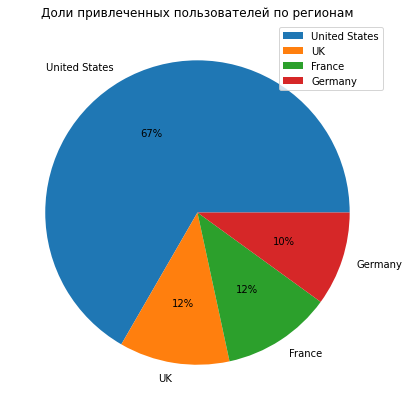

In [45]:
region.plot(y='user_id', kind='pie', autopct='%.0f%%', figsize=(7, 7))
plt.title('Доли привлеченных пользователей по регионам')
plt.ylabel('')
plt.show()

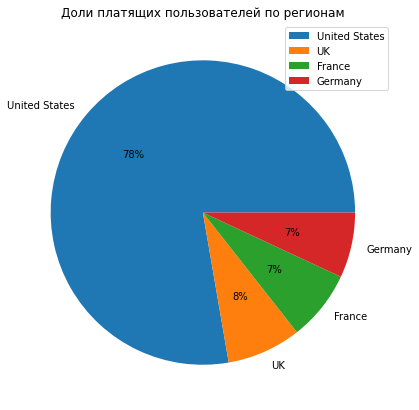

In [46]:
region.plot(y='payer', kind='pie', autopct='%.0f%%', figsize=(7, 7))
plt.title('Доли платящих пользователей по регионам')
plt.ylabel('')
plt.show()

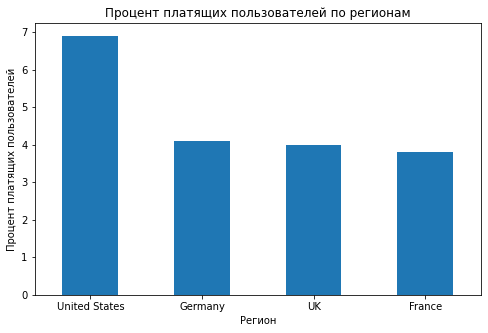

In [47]:
ax = (
    region['per_cent'].sort_values(ascending=False).
    T.plot(kind='bar', figsize=(8, 5))
)
ylab = ax.set_ylabel('Процент платящих пользователей')
xlab = ax.set_xlabel('Регион')
title = ax.set_title('Процент платящих пользователей по регионам')
plt.xticks(rotation=0)
plt.show()

**Вывод**

`67%` новых пользователей приходит из США, из Великобритании и Франции - по `12%`, а из Германии - `10%` пользователей.

`78%` платящих пользователей находится в США, в Великобритании - `8%`, во Франции и Германии - по `7%` пользователей.

Переход из неплатящих в платящих совершает `6.9%` новых пользователей из США, `4.1%` из Германии, `4%` из Великобритании и `3.8%` из Франции.

Таким образом, основной объем пользователей сервиса, как платящих, так и не платящих, находится в США. Пользователи из США с большей вероятностью становятся платящими.

Также стоит обратить внимание на пользователей из Германии: их меньше всего, но они чаще переходят в платящих, чем пользователи из Великобритании и Франции.

### Анализ устройств

Сгруппируем профайлы по устройствам входа и определим количество привлеченных пользователей, количество платящих пользователей и процент платящих пользователей по отношению к общему количеству пользователей для каждого устройства. Построим графики.

In [48]:
device = (
    profiles.groupby('device').
    agg({'user_id' : 'count', 'payer' : 'sum'}).
    sort_values(by='user_id', ascending=False)
)

device['per_cent'] = (device['payer'] / device['user_id'] * 100).round(2)

device

,user_id,payer,per_cent
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05
Mac,30042,1912,6.36


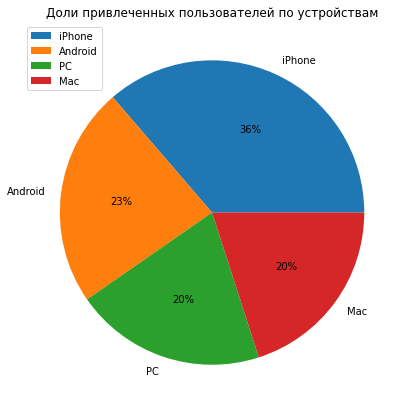

In [49]:
device.plot(y='user_id', kind='pie', autopct='%.0f%%', figsize=(7, 7))
plt.title('Доли привлеченных пользователей по устройствам')
plt.ylabel('')
plt.show()

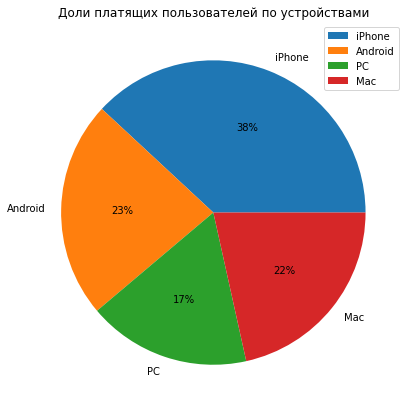

In [50]:
device.plot(y='payer', kind='pie', autopct='%.0f%%', figsize=(7, 7))
plt.title('Доли платящих пользователей по устройствами')
plt.ylabel('')
plt.show()

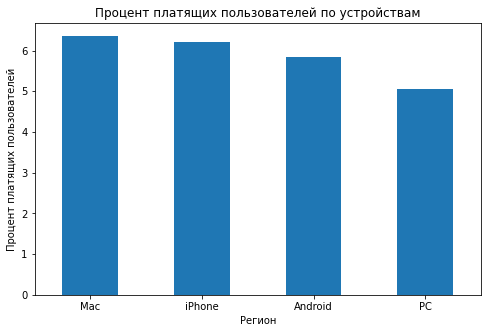

In [51]:
ax = (
    device['per_cent'].sort_values(ascending=False).
    T.plot(kind='bar', figsize=(8, 5))
)
ylab = ax.set_ylabel('Процент платящих пользователей')
xlab = ax.set_xlabel('Регион')
title = ax.set_title('Процент платящих пользователей по устройствам')
plt.xticks(rotation=0)
plt.show()

**Вывод**

`36%` новых пользователей использует IPhone, у `23%` - Android, а PC и Mac пользуется по `20%` пользователей.

`38%` платящих пользователей использует IPhone, `23%` - Android, `22%` - Mac и `20%` - PC.

Переход из неплатящих в платящих совершает `6.36%` пользователей Mac, `6.21%` пользователей IPhone, `5.85%` - Android, `5.05%` - PC.

Таким образом, основной объем пользователей сервиса, как платящих, так и не платящих, использует IPhone. Данные пользователи с большой вероятностью переходят в платящих, но с наибольшей вероятностью это делают пользователи Mac.

В целом, `60%` пользователей заходит на сервис и оплачивает покупки через телефон, а `40%` - через ПК.

### Анализ каналов привлечения

Сгруппируем профайлы по каналам привлечения и определим количество привлеченных пользователей, количество платящих пользователей и процент платящих пользователей по отношению к общему количеству пользователей для каждого канала. Построим графики.

In [52]:
channel = (
    profiles.groupby('channel').
    agg({'user_id' : 'count', 'payer' : 'sum'}).
    sort_values(by='user_id', ascending=False)
)

channel['per_cent'] = (channel['payer'] / channel['user_id'] * 100).round(2)

channel

,user_id,payer,per_cent
channel,,,
organic,56439,1160,2.06
FaceBoom,29144,3557,12.20
TipTop,19561,1878,9.60
OppleCreativeMedia,8605,233,2.71
LeapBob,8553,262,3.06
WahooNetBanner,8553,453,5.30
RocketSuperAds,4448,352,7.91
MediaTornado,4364,156,3.57
YRabbit,4312,165,3.83


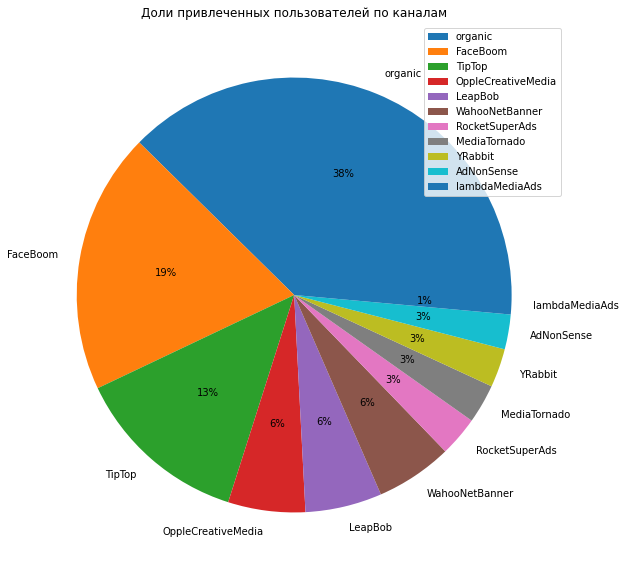

In [53]:
channel.plot(y='user_id', kind='pie', autopct='%.0f%%', figsize=(10, 10))
plt.title('Доли привлеченных пользователей по каналам')
plt.ylabel('')
plt.show()

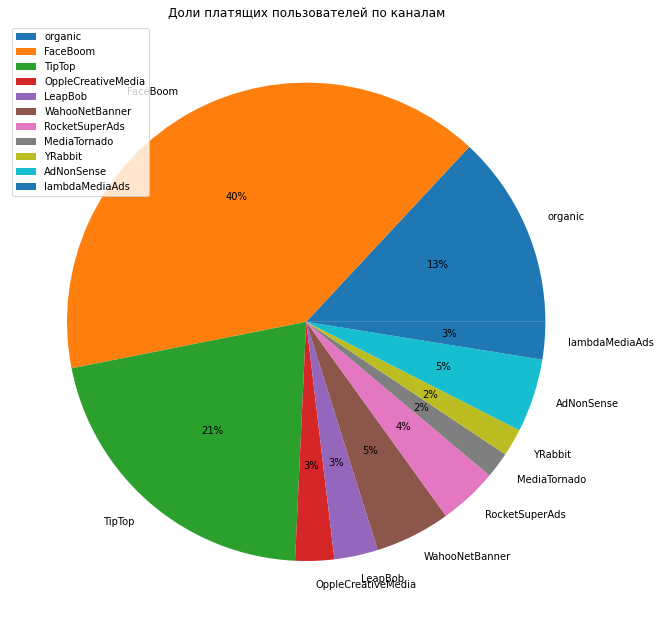

In [54]:
channel.plot(y='payer', kind='pie', autopct='%.0f%%', figsize=(11, 11))
plt.title('Доли платящих пользователей по каналам')
plt.ylabel('')
plt.show()

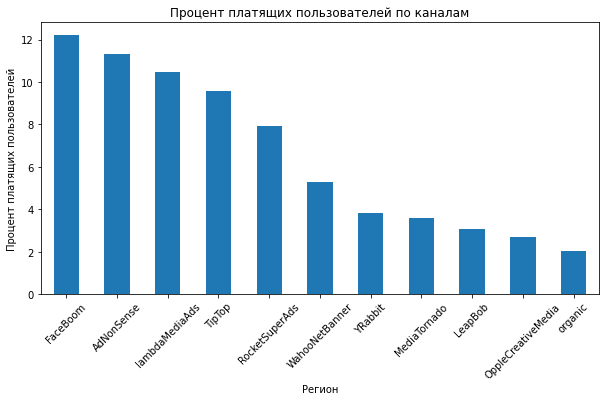

In [55]:
ax = (
    channel['per_cent'].sort_values(ascending=False).
    T.plot(kind='bar', figsize=(10, 5))
)
ylab = ax.set_ylabel('Процент платящих пользователей')
xlab = ax.set_xlabel('Регион')
title = ax.set_title('Процент платящих пользователей по каналам')
plt.xticks(rotation=45)
plt.show()

**Вывод**

`38%` новых пользователей приходит самостоятельно, `19%` - через FaceBoom, а `13%` через TipTop.

`40%` платящих пользователей пришли через FaceBoom, `21%` - через TipTop, `13%` зашли на сервис без посредников.

Переход из неплатящих в платящих совершает `12.2%` пользователей, пришедших через FaceBoom, `11.34%` - через AdNonSense, `10.47%` - через lambdaMediaAds, `9.6%` - через TipTop. Наименьший процент у пользователей, которые нашли сервис сами - `2.06%`.

Таким образом, основной объем новых пользователей приходит на сервис самостоятельно. При этом данный канал занимает третье место по количеству платящих пользователей. Но это только из-за большого общего количества, поскольку процент перехода в платящих у данного канала самый маленький.

Наибольшее количество платящих пользователей пришло через FaceBoom, они также имеют наилучший процент перехода из неплатящих в платящих.

Также стоит обратить внимание на каналы привлечения AdNonSense и lambdaMediaAds, т.к. они входят в тройку по проценту перехода в платящих пользователей.

### Анализ маркетинга

#### Анализ трат на рекламу

Посчитаем, сколько всего было потрачено на рекламу в период с 01.05.2019 г. по 27.10.2019 г.

In [56]:
df_costs['costs'].sum()

105497.30000000002

Рассчитаем объем трат на рекламу по каждому каналу в отдельности. Построим график.

In [57]:
costs_per_channel = (
    df_costs.groupby(['channel']).
    agg({'costs' : 'sum'}).
    sort_values(by='costs', ascending=False)
)

costs_per_channel

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


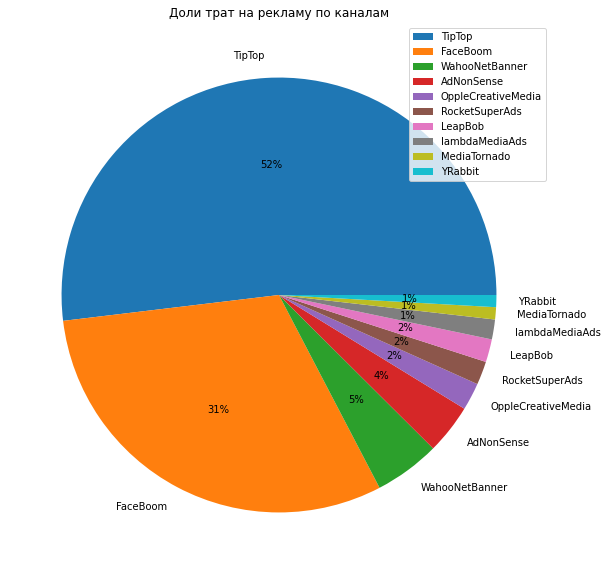

In [58]:
costs_per_channel.plot(y='costs', kind='pie', autopct='%.0f%%',
                       figsize=(10, 10))
plt.title('Доли трат на рекламу по каналам')
plt.ylabel('')
plt.show()

Посморим динамику трат на запуск рекламы. Для этого добавим номер недели в таблицу с тратами для удобтва построения графика. Сгруппируем данные по каналам и рассчитаем сумму затрат на рекламу в каждую неделю. Построим график.

In [59]:
df_costs['week'] = df_costs['dt'].dt.isocalendar().week
df_costs.head()

,dt,channel,costs,week
0,2019-05-01,FaceBoom,113.3,18
1,2019-05-02,FaceBoom,78.1,18
2,2019-05-03,FaceBoom,85.8,18
3,2019-05-04,FaceBoom,136.4,18
4,2019-05-05,FaceBoom,122.1,18


In [60]:
costs_per_dt = df_costs.pivot_table(index=['channel'], columns='week',
                                    values='costs', aggfunc='sum')

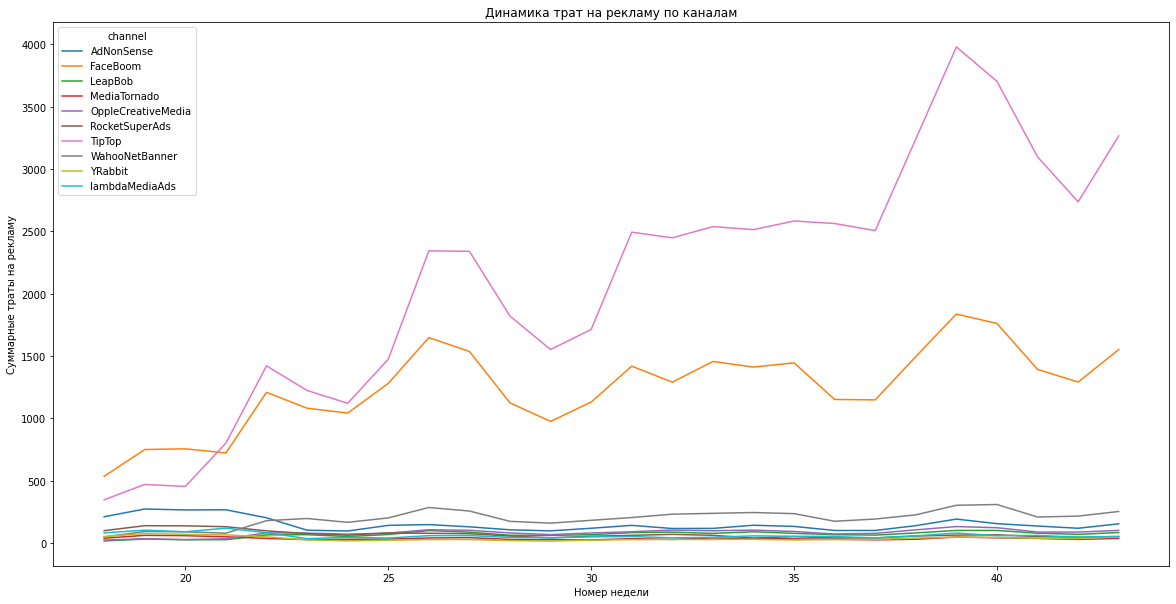

In [61]:
ax = (
    costs_per_dt.T.plot(kind='line', figsize=(20, 10))
)
ylab = ax.set_ylabel('Суммарные траты на рекламу')
xlab = ax.set_xlabel('Номер недели')
title = ax.set_title('Динамика трат на рекламу по каналам')

plt.show()

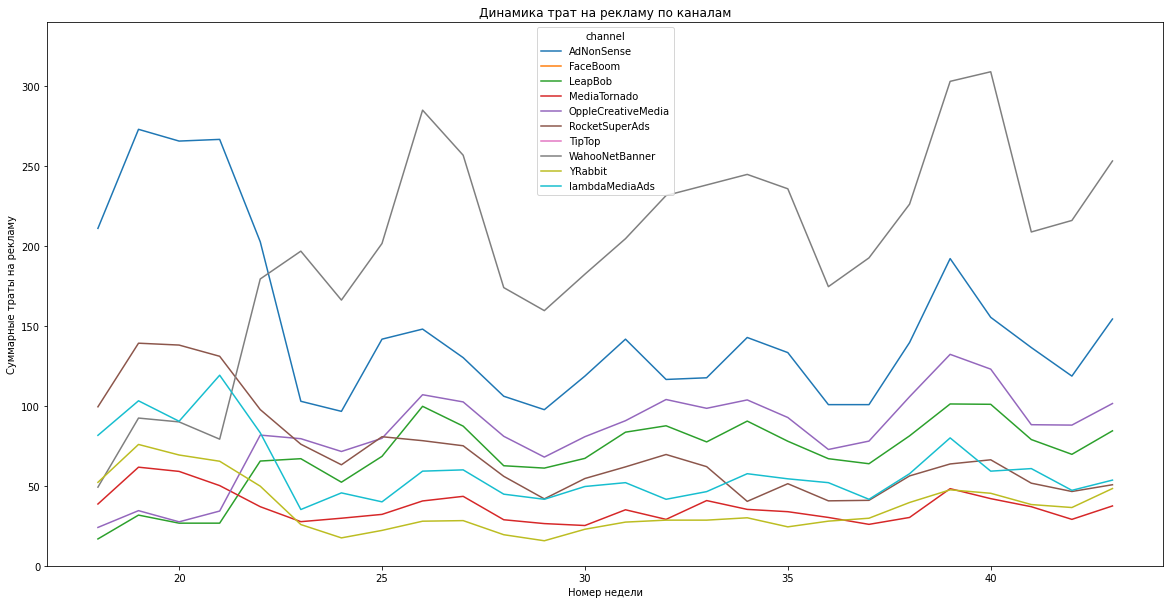

In [62]:
# укрупним график
ax = (
    costs_per_dt.T.plot(kind='line', figsize=(20, 10))
)
plt.ylim(0, 340)
ylab = ax.set_ylabel('Суммарные траты на рекламу')
xlab = ax.set_xlabel('Номер недели')
title = ax.set_title('Динамика трат на рекламу по каналам')

plt.show()

**Вывод**

В период с 01.05.2019 г. по 27.10.2019 г. на рекламу было потрачено `105 497 условных единиц`. Из них `52%` было потрачено на привлечение пользователей из TipTop, `31%` - FaceBoom, `17%` распределены между остальными восемью каналами привлечения. При этом, новых пользователей и платящих пользователей из TipTop меньше, чем из FaceBoom. Пользователи из TipTop конвертируются в платящих хуже, чем пользователи, пришедшие из AdNonSense и lambdaMediaAds. На эти каналы было потрачено `4%` и `1%` бюджета соответственно.

Несмотря на вышесказанное, траты на TipTop постоянно увеличивались: за 25 недель траты в неделю увеличись почти в `10 раз`. У FaceBoom недельные траты увеличились в `3 раза`. У WahooNetBanner - в `5 раз`, хотя только `5.3%` пользователей, пришедших оттуда конвертируются в платящих. В то же время траты на AdNonSense уменьшились почти на `30%`, а на lambdaMediaAds - на `34%`. 

Траты на MediaTornado и YRabbit остались на том же уровне.

#### Анализ CAC

Посчитаем среднюю стоимость привлечения одного клиента за анализируемый период по всем каналам в целом и по отдельности.

In [63]:
round(profiles['cac'].mean(), 2)

0.7

In [64]:
cac_per_channel = (
    profiles.query('channel != "organic"').
    groupby('channel').
    agg({'cac' : 'mean'}).
    sort_values(by='cac', ascending=False)
)

cac_per_channel

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


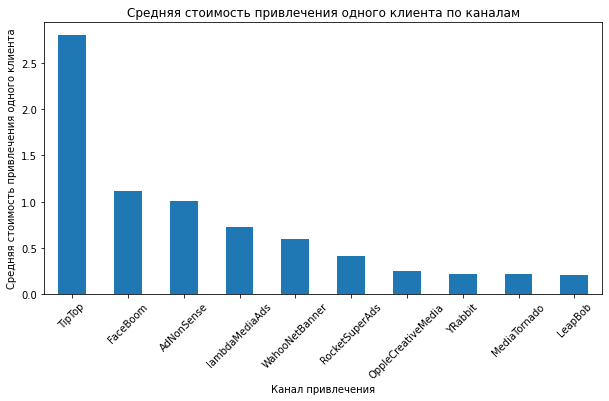

In [65]:
ax = cac_per_channel['cac'].T.plot(kind='bar', figsize=(10, 5))

ylab = ax.set_ylabel('Средняя стоимость привлечения одного клиента')
xlab = ax.set_xlabel('Канал привлечения')
title = ax.set_title('Средняя стоимость привлечения одного клиента по каналам')
plt.xticks(rotation=45)
plt.show()

**Вывод**

Средняя стоимость привлечения одного клиента за период с 01.05.2019 г. по 27.10.2019 г. составила `0.70 условных единиц`.

Самые "дорогие" клиенты пришли из TipTop, FaceBoom, AdNonSense: их значения больше среднего в `4 раза`, `в 1.5 раза` и в `1.4 раза` соответственно. Пользователи, пришедшие из lambdaMediaAds, стоили как среднее значение.

Самые "дешевые" клиенты пришли из YRabbit, MediaTornado, LeapBob: их значения меньше среднего в `3 раза`.

Далее посмотрим, окупились ли привлеченные клиенты.

## Анализ окупаемости рекламы

Прежде чем анализировать окупаемость рекламы, уберем из профайлов клиентов, которые пришли на сервис самостоятельно. Они "бесплатные" и окупаются при любой стоимости заказа.

In [66]:
profiles_new = (
    profiles.loc[profiles['channel'] != 'organic'].
    copy().reset_index(drop=True)
)

profiles_new.head()

,user_id,first_enter_time,channel,region,device,dt,month,payer,cac
0,599326,2019-05-07 20:58:57,FaceBoom,United States,Mac,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,United States,iPhone,2019-07-09,2019-07-01,False,1.107237
2,22593348,2019-08-22 21:35:48,AdNonSense,Germany,PC,2019-08-22,2019-08-01,False,0.988235
3,31989216,2019-10-02 00:07:44,YRabbit,United States,iPhone,2019-10-02,2019-10-01,False,0.230769
4,46006712,2019-06-30 03:46:29,AdNonSense,France,Android,2019-06-30,2019-06-01,True,1.008000


### Общий анализ LTV, CAC и ROI

Для начала создадим таблицы LTV, ROI и их динамик с помощью функции `get_ltv_and_roi()`. Посмотрим, как выглядят таблицы.

In [67]:
ltv_raw, ltv, ltv_in_time, roi, roi_in_time = get_ltv_and_roi(
    profiles_new, df_orders, observation_date, horizon_days)

In [68]:
ltv

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,86138,0.344835,0.435825,0.503889,0.560611,0.611611,0.654576,0.694741,0.730661,0.765474,0.797583,0.826827,0.852804,0.878797,0.903117


In [69]:
ltv_in_time.tail()

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-10-10,511,0.500059,0.607476,0.685597,0.716849,0.804736,0.863346,0.912172,0.970763,1.009824,1.068415,1.097710,1.146536,1.185597,1.195362
2019-10-11,615,0.214211,0.287236,0.335919,0.368374,0.400829,0.408943,0.473902,0.498244,0.546927,0.579398,0.579398,0.611854,0.628081,0.652423
2019-10-12,607,0.363427,0.429193,0.569012,0.577232,0.601895,0.610115,0.626557,0.659440,0.675881,0.708764,0.725206,0.733427,0.741647,0.758089
2019-10-13,536,0.335168,0.418974,0.474832,0.530690,0.588414,0.625653,0.681511,0.700131,0.737369,0.755989,0.793228,0.821157,0.867705,0.877015
2019-10-14,480,0.353458,0.469896,0.542667,0.584250,0.615438,0.625833,0.646625,0.667417,0.688208,0.709000,0.719396,0.740188,0.781771,0.812958


In [70]:
roi

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,86138,1.112235,0.310038,0.391846,0.453041,0.50404,0.549894,0.588523,0.624634,0.656931,0.688231,0.717099,0.743392,0.766748,0.790117,0.811984


In [71]:
roi_in_time.tail()

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,,
2019-10-10,511,1.391781,0.359294,0.436474,0.492604,0.515059,0.578206,0.620318,0.655399,0.697497,0.725562,0.767660,0.788709,0.823791,0.851856,0.858872
2019-10-11,615,1.331081,0.160930,0.215791,0.252365,0.276748,0.301131,0.307226,0.356028,0.374315,0.410889,0.435284,0.435284,0.459667,0.471858,0.490145
2019-10-12,607,1.282389,0.283398,0.334682,0.443712,0.450123,0.469354,0.475765,0.488586,0.514228,0.527049,0.552691,0.565512,0.571922,0.578333,0.591154
2019-10-13,536,1.307491,0.256344,0.320441,0.363163,0.405885,0.450033,0.478514,0.521236,0.535477,0.563958,0.578198,0.606679,0.628040,0.663642,0.670762
2019-10-14,480,1.228146,0.287798,0.382606,0.441858,0.475717,0.501111,0.509576,0.526505,0.543434,0.560364,0.577293,0.585758,0.602687,0.636546,0.661940


In [72]:
# проверим, совпадает ли сумма размеров когорт ltv с количеством новых 
# пользователей в анализируемый период

print(ltv['cohort_size'].sum())
profiles_new.loc[profiles_new['dt'] <= '2019-10-14', 'user_id'].count()

86138


86138

По таблицам видно, что значения в каждой строке не снижаются, а увеличиваются. Момент и горизонт анализа также определены верно. Сумма размеров когорт LTV совпадает с количеством новых пользователей в анализируемый период. Значит, функция работет верно.

Теперь строим графики LTV, ROI и CAC с помощью функции `plot_ltv_and_roi()`.

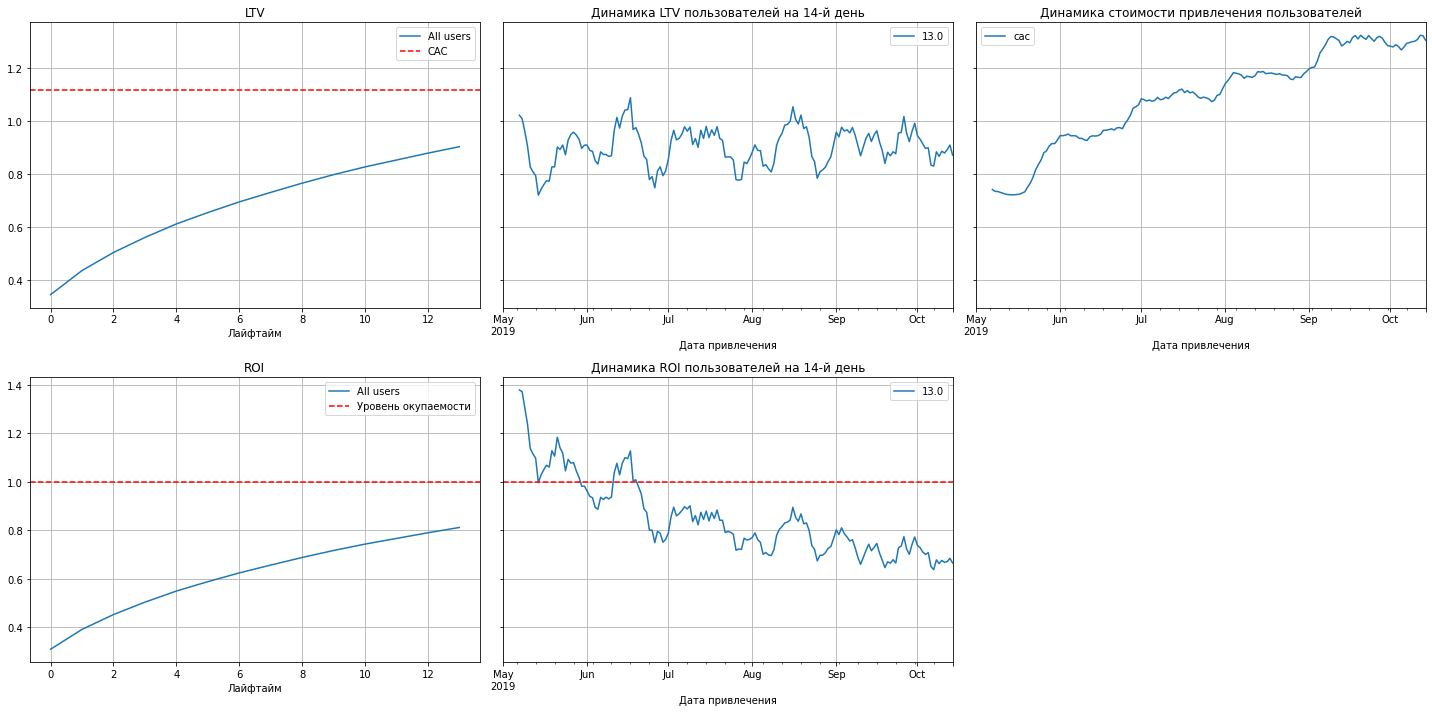

In [73]:
plot_ltv_and_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days, window=7)

**Вывод**

На графике LTV видно, что один клиент в течение двух недель не приносит достаточное количество денег, чтобы окупить стоимость своего привлечения. Максимальный LTV меньше среднего CAC на `18.79%`. При этом LTV выглядит достаточно стабильно, т.е. ухудшения качества пользователей не наблюдается.

К концу второй недели лайфтайма ROI равен `81%`. На графике динамики ROI видно, что пользователи, привлеченные в мае и, частично, в июне окупили свое привлечение, и это в условиях постоянного спада ROI со `115%` до `66%` за 5.5 месяцев.

На графике CAC видно, что стоимость привлечения одного пользователя выросла с `0.75` до `1.32 единиц`. Т.е. окупаемость инвестиций упало на `49%`, а стоимость привлечения одного пользователя выросла на `76%`.

Чтобы выяснить причину случившегося рассмотрим данные показатели в зависимости от устройств, регионов и каналов привлечения.

### Анализ LTV, CAC и ROI по устройствам

Создадим таблицы LTV, ROI и их динамик с разбивкой по устройствам пользователей с помощью функции `get_ltv_and_roi()`. Посмотрим, как выглядят таблицы.

In [74]:
ltv_raw_dev, ltv_dev, ltv_in_time_dev, roi_dev, roi_in_time_dev = (
    get_ltv_and_roi(profiles_new, df_orders, observation_date,
                    horizon_days, dimensions=['device'])
)

In [75]:
ltv_dev

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20092,0.337223,0.429726,0.498728,0.553369,0.606625,0.660433,0.698736,0.737634,0.773107,0.805696,0.832519,0.854872,0.886967,0.911556
Mac,17263,0.381329,0.479749,0.549301,0.605217,0.651763,0.686161,0.722642,0.753689,0.792261,0.826778,0.858808,0.885691,0.906217,0.932290
PC,17612,0.280144,0.364705,0.431014,0.486162,0.541141,0.583244,0.633465,0.664801,0.703856,0.733098,0.765569,0.792430,0.815663,0.840429
iPhone,31171,0.366081,0.455614,0.523240,0.582642,0.632405,0.673612,0.711335,0.750626,0.780534,0.812619,0.840059,0.867370,0.894015,0.916941


In [76]:
ltv_in_time_dev.head()

cohort_size       0.0       1.0       2.0       3.0  \
device  dt                                                                
Android 2019-05-01           95  0.367684  0.472737  0.525263  0.630316   
        2019-05-02           73  0.136712  1.026575  1.094932  1.094932   
        2019-05-03           89  0.224270  0.392472  0.560674  0.728876   
        2019-05-04          101  0.543465  0.691683  0.741089  0.790495   
        2019-05-05          103  0.193786  0.679126  0.679126  0.727573   

                         4.0       5.0       6.0       7.0       8.0  \
device  dt                                                             
Android 2019-05-01  0.682842  0.682842  0.682842  0.787895  0.945474   
        2019-05-02  1.094932  1.300137  1.300137  1.436849  1.436849   
        2019-05-03  0.841011  0.841011  0.841011  0.841011  0.953146   
        2019-05-04  0.938713  1.037525  1.086931  1.235149  1.284554   
        2019-05-05  0.727573  0.776019  0.776019  0.776019  0.776019   

                         9.0      10.0      11.0      12.0      13.0  
device  dt                                                            
Android 2019-05-01  0.998000  0.998000  1.103053  1.155579  1.208105  
        2019-05-02  1.505205  1.573562  1.573562  1.573562  1.641918  
        2019-05-03  0.953146  1.009213  1.065281  1.121348  1.177416  
        2019-05-04  1.333960  1.383366  1.482178  1.482178  1.482178  
        2019-05-05  0.776019  0.824466  0.824466  0.872913  0.872913

In [77]:
roi_dev

,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,,
Android,20092,1.014858,0.332286,0.423434,0.491426,0.545267,0.597744,0.650764,0.688506,0.726835,0.761788,0.793900,0.820330,0.842356,0.873982,0.898211
Mac,17263,1.268780,0.300548,0.378118,0.432936,0.477007,0.513693,0.540803,0.569557,0.594026,0.624428,0.651632,0.676877,0.698065,0.714243,0.734792
PC,17612,0.789941,0.354639,0.461687,0.545628,0.615440,0.685039,0.738339,0.801914,0.841583,0.891024,0.928042,0.969147,1.003150,1.032562,1.063914
iPhone,31171,1.270406,0.288161,0.358636,0.411869,0.458626,0.497798,0.530234,0.559927,0.590855,0.614398,0.639653,0.661253,0.682751,0.703724,0.721770


In [78]:
roi_in_time_dev.head()

cohort_size       cac       0.0       1.0       2.0  \
device  dt                                                                
Android 2019-05-01           95  0.750061  0.490206  0.630265  0.700294   
        2019-05-02           73  0.666357  0.205164  1.540578  1.643160   
        2019-05-03           89  0.780232  0.287440  0.503019  0.718599   
        2019-05-04          101  0.754812  0.720001  0.916365  0.981820   
        2019-05-05          103  0.689570  0.281025  0.984855  0.984855   

                         3.0       4.0       5.0       6.0       7.0  \
device  dt                                                             
Android 2019-05-01  0.840353  0.910382  0.910382  0.910382  1.050441   
        2019-05-02  1.643160  1.643160  1.951111  1.951111  2.156275   
        2019-05-03  0.934178  1.077898  1.077898  1.077898  1.077898   
        2019-05-04  1.047274  1.243638  1.374548  1.440002  1.636366   
        2019-05-05  1.055111  1.055111  1.125367  1.125367  1.125367   

                         8.0       9.0      10.0      11.0      12.0      13.0  
device  dt                                                                      
Android 2019-05-01  1.260529  1.330559  1.330559  1.470617  1.540647  1.610676  
        2019-05-02  2.156275  2.258857  2.361439  2.361439  2.361439  2.464020  
        2019-05-03  1.221618  1.221618  1.293478  1.365338  1.437198  1.509058  
        2019-05-04  1.701821  1.767275  1.832730  1.963639  1.963639  1.963639  
        2019-05-05  1.125367  1.125367  1.195623  1.195623  1.265880  1.265880

Теперь строим графики LTV, ROI и CAC с помощью функции `plot_ltv_and_roi()`.

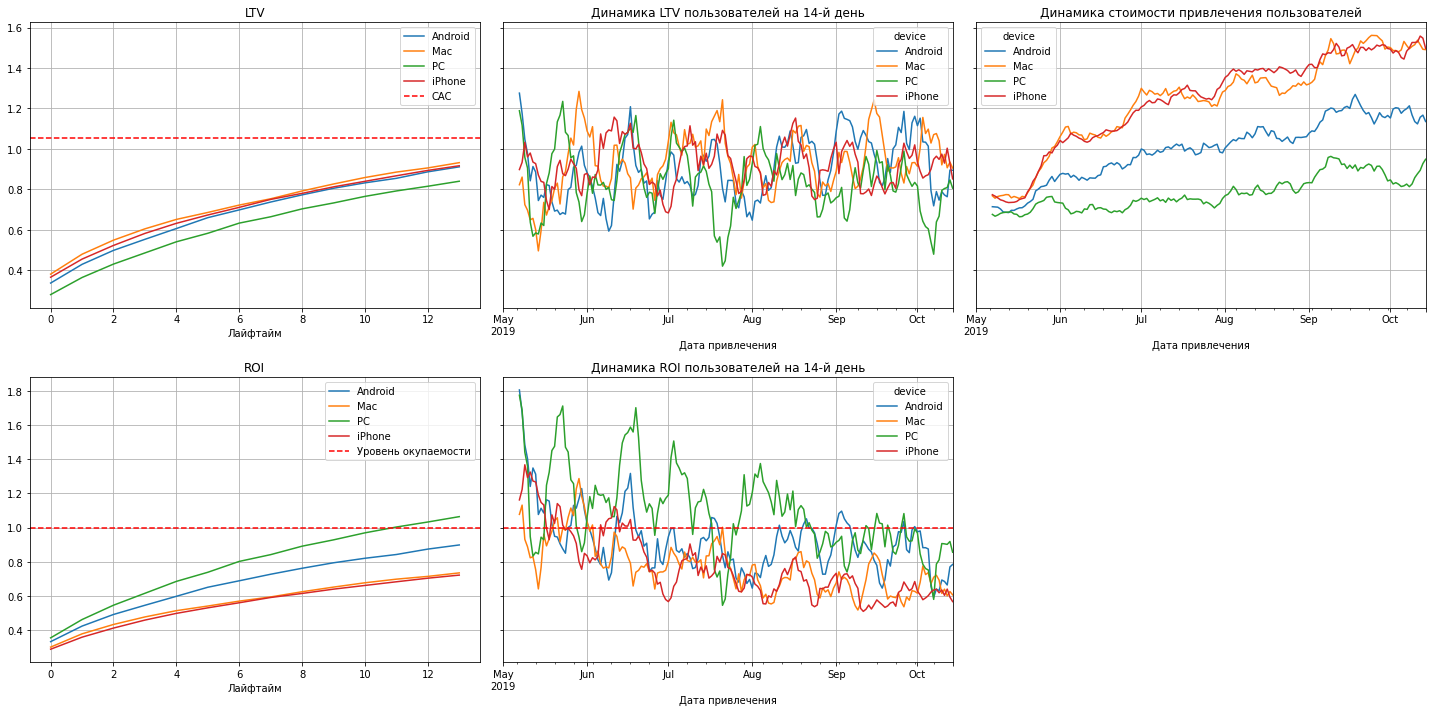

In [79]:
plot_ltv_and_roi(ltv_dev, ltv_in_time_dev, roi_dev, roi_in_time_dev,
                 horizon_days, window=7)

**Вывод**

На графике LTV видно, что ни один клиент в течение двух недель не приносит достаточное количество денег, чтобы окупить медианную стоимость привлечения. Есть посмотреть на таблицу LTV, то данный показатель на достигает CAC для каждого устройства тоже.

Пользователи Mac и IPhone имеют лучшую "пожизненную ценность", их динамика LTV достаточно стабильна, но из-за высокой стоимости привлечения, имеют низкий уровень возврата инвестиций - `73%` к концу второй недели лайфтайма. CAC для данных устройств вырос почти в `2 раза` за анализируемый период. Из динамики ROI видно, что пользователи данных устройств частично окупались в мае-июне, далее наблюдается спад.

LTV пользователей Android равен LTV пользователей IPhone, но из-за более низкой стоимости привлечения показатель ROI к концу второй недели лайфтайма равен `90%`. Динамика LTV стабильна, а динамика ROI на 14-ый день лайфтайма стабильнее, чем у остальных устройств; есть периоды окупаемости привлечения пользователей на протяжении всего анализируемого периода, кроме октября. При этом наблюдается тенденция снижения ROI. CAC для Android вырос на `60%` за анализируемый период.

Пользователи PC в среднем приносят наименьшее количество средств, но из-за низкой стоимости привлечения инвестиции окупаются на 11-ый день лайфтайма, и к 14-ому дню ROI достигает `106%`. При этом динамика выглядит очень нестабильно. На графике динамики LTV видны резкие падения показателя в мае, июне и октябре, что отражается и на возврате инвестиций. Это может быть связано с ошибками, например, невозможностью перехода на страницу оплаты. Если будут предосталены данные об иных действиях пользователей, помимо заказов, то это можно будет проверить отдельно. CAC для PC вырос на `36%` за анализируемый период.

В целом, пользователи PC окупаются лучше всего: октябрь - единственный месяц, в который показатель ROI был ниже `100%`. В мое этот показатель доходил до `170-180%`.

### Анализ LTV, CAC и ROI по регионам

Создадим таблицы LTV, ROI и их динамик с разбивкой по регионам пользователей с помощью функции `get_ltv_and_roi()`. Посмотрим, как выглядят таблицы.

In [80]:
ltv_raw_reg, ltv_reg, ltv_in_time_reg, roi_reg, roi_in_time_reg = (
    get_ltv_and_roi(profiles_new, df_orders, observation_date,
                    horizon_days, dimensions=['region'])
)

Теперь строим графики LTV, ROI и CAC с помощью функции `plot_ltv_and_roi()`.

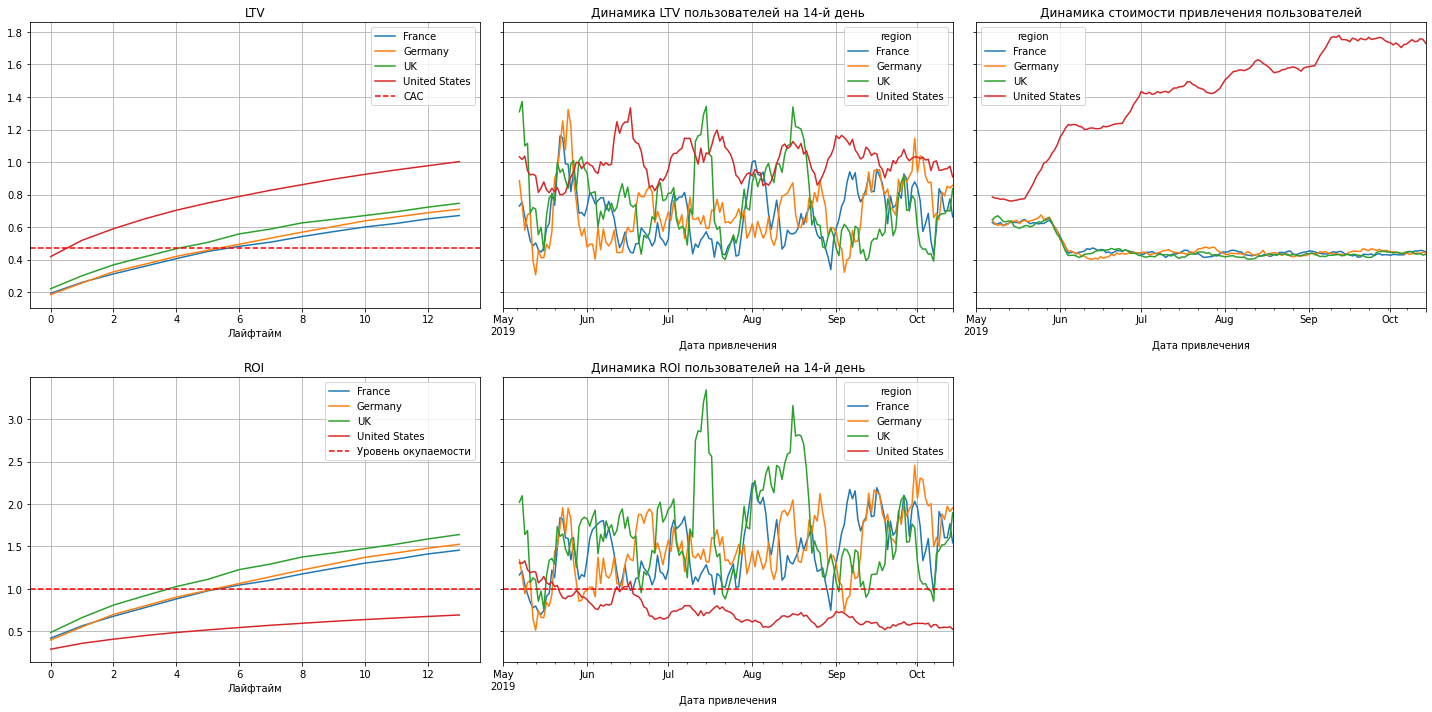

In [81]:
plot_ltv_and_roi(ltv_reg, ltv_in_time_reg, roi_reg, roi_in_time_reg,
                 horizon_days, window=7)

**Вывод**

На графиках явно выделяется США. У пользователей из данного региона наивысший показатель LTV, который превышает медианный CAC, но в то же время CAC для США равен `1.45`, когда макисмальный LTV США немного превышет `1`. Динамика LTV достаточно стабильна, но из-за высокой стоимости привлечения показатель ROI равен `70%` к концу второй недели лайфтайма. Динамика ROI отображает тенденцию постоянного спада; пользователи окупались только в мае и июне. За 5.5 месяцев CAC увеличился на `122%`.

Пользователи из Европы тоже приносят достаточное количество средств, чтобы окупить свое привлечение: их LTV превышает соответствующий CAC на `46-63%`. На графике динамики CAC видно резкое его падение в Европе на `32%` в июне по сравнению с маем, т.е. привлечение одного пользователя стало дешевле. Далее график стабилен. Показател ROI для европейцев достигает `100%` на 4-6 день лайфтайма, а концу 14-ого дня равен `149-153%`. При этом динамика показателей не так стабильна, как для пользователей из США.

У Великобритании наблюдается два скачка возврата инвестиций в июле-августе, где значения превышают `300%`. Т.к. динамика CAC для королевства стабильна, то это вряд ли связано с какой-то рекламной компанией. Возможно, в сервис была добавлена какая-то функция, которая очень понравилась британским пользователям. Пока что мало данных, чтобы определить причину таких скачков.

### Анализ LTV, CAC и ROI по каналам привлечения

Создадим таблицы LTV, ROI и их динамик с разбивкой по каналам привлечения пользователей с помощью функции `get_ltv_and_roi()`. Посмотрим, как выглядят таблицы.

In [82]:
ltv_raw_chan, ltv_chan, ltv_in_time_chan, roi_chan, roi_in_time_chan = (
    get_ltv_and_roi(profiles_new, df_orders, observation_date,
                    horizon_days, dimensions=['channel'])
)

Теперь строим графики LTV, ROI и CAC с помощью функции `plot_ltv_and_roi()`.

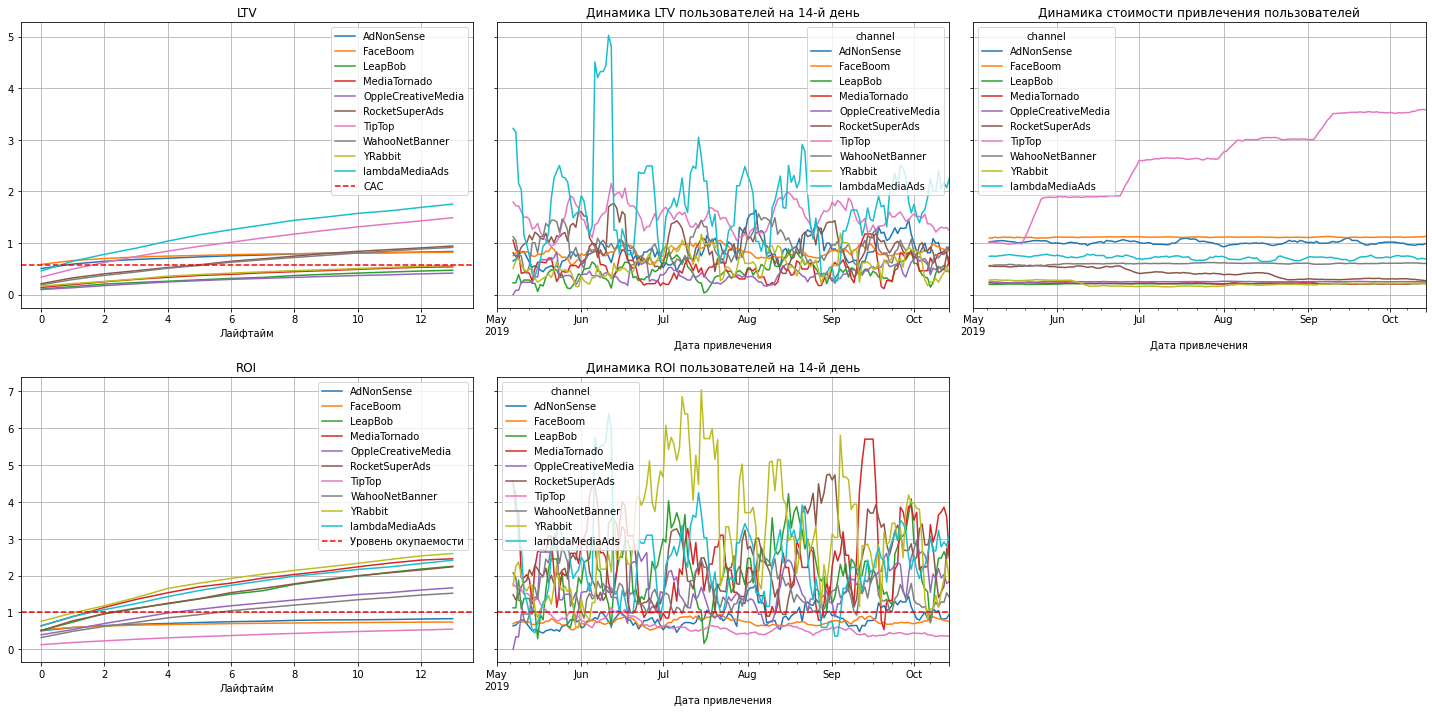

In [83]:
plot_ltv_and_roi(ltv_chan, ltv_in_time_chan, roi_chan, roi_in_time_chan,
                 horizon_days, window=7)

**Вывод**

По привлечению денег явно выделяется LambdaMediaAds. При стабильном и не самом дорогом CAC данный канал имеет самый высокий LTV: пользователи окупаются на 2-3 день лайфтайма и к концу второй недели приносят на `142%` больше денег, чем было потрачено на их привлечение. Динамика LTV не стабильна, очень выделяется скачок в июне, но динамика ROI достаточно стабильна, реклама окупается ежемесячно.

Самый высокий показатель ROI у YRabbit и MediaTornado - `260%` и `245%` соответственно. Динамика ROI не стабильна, но ежемесячно выше `100%`. Показатель LTV достигает медианный CAC только к концу второй недели, но свой CAC данные каналы превышают в `2,5 раза`. Стоимость привлечения одного клиента стабильная и низкая.

Самый низкий ROI у AdNoneSense, FaceBoom и TipTop: `83%`, `74%` и `55%` соответственно. Привлечение пользователя из AdNoneSense достаточно дорогое, а данные пользователи приносят недостаточно средств, чтобы себя окупить. Динамика ROI стабильна, есть периоды в июле-сентябре, когда показатель превышал `100%`. То же можно сказать и про FaceBoom, но ROI в динамике ни разу не пересекал `100%`.

Пользователи из TipTop имеют высокий LTV, который стабилен в динамике, т.е. качество пользователей хорошее. Но бюджет на рекламу постоянно увеличивался из-за чего показатель ROI самый низкий и в динамике ни разу не пересекал `100%`. За 5.5 месяцев стоимость привлечения одного клиента увеличилась в `3.5 раза`.


## Анализ удержания и конверсии

### Анализ удержания и конверсии по устройствам

Построим таблицы конверсии и ее динамики с помощью функции `get_conversion()`, посмотрим, как они выглядят. Построим графики.

In [84]:
conversion_raw_dev, conversion_table_dev, conversion_in_time_dev = (
    get_conversion(profiles_new, df_orders, observation_date, horizon_days,
    dimensions=['device'])
    )

In [85]:
conversion_table_dev

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20092,0.057934,0.065947,0.069729,0.072118,0.074159,0.075353,0.076548,0.077195,0.077742,0.078389,0.078688,0.078987,0.079335,0.079484
Mac,17263,0.064299,0.072988,0.076754,0.079303,0.081040,0.082315,0.083184,0.083995,0.084748,0.085675,0.086312,0.086543,0.086659,0.087065
PC,17612,0.046957,0.053429,0.056325,0.058540,0.060697,0.062003,0.063082,0.063877,0.064558,0.064899,0.065183,0.065296,0.065524,0.065807
iPhone,31171,0.062462,0.070065,0.073915,0.076930,0.078727,0.080010,0.080780,0.081871,0.082641,0.083315,0.083764,0.084245,0.084437,0.084758


In [86]:
conversion_in_time_dev.tail()

cohort_size       0.0       1.0       2.0       3.0  \
device dt                                                                
iPhone 2019-10-10          196  0.096939  0.107143  0.107143  0.107143   
       2019-10-11          223  0.040359  0.044843  0.049327  0.049327   
       2019-10-12          237  0.092827  0.097046  0.113924  0.113924   
       2019-10-13          186  0.032258  0.032258  0.037634  0.048387   
       2019-10-14          187  0.069519  0.074866  0.080214  0.080214   

                        4.0       5.0       6.0       7.0       8.0       9.0  \
device dt                                                                       
iPhone 2019-10-10  0.107143  0.107143  0.107143  0.107143  0.107143  0.107143   
       2019-10-11  0.053812  0.053812  0.053812  0.053812  0.053812  0.053812   
       2019-10-12  0.113924  0.113924  0.118143  0.118143  0.122363  0.122363   
       2019-10-13  0.053763  0.053763  0.059140  0.059140  0.059140  0.059140   
       2019-10-14  0.080214  0.080214  0.080214  0.080214  0.080214  0.080214   

                       10.0      11.0      12.0      13.0  
device dt                                                  
iPhone 2019-10-10  0.107143  0.107143  0.107143  0.107143  
       2019-10-11  0.053812  0.053812  0.053812  0.053812  
       2019-10-12  0.122363  0.122363  0.122363  0.122363  
       2019-10-13  0.064516  0.064516  0.064516  0.064516  
       2019-10-14  0.080214  0.080214  0.080214  0.080214

In [87]:
# проверим, совпадает ли сумма размеров когорт конверсии с количеством новых 
# пользователей в анализируемый период

print(conversion_table_dev['cohort_size'].sum())
profiles_new.loc[profiles_new['dt'] <= '2019-10-14', 'user_id'].count()

86138


86138

In [88]:
(conversion_table_dev.drop(columns=['cohort_size']) > 1).sum()

0.0     0
1.0     0
2.0     0
3.0     0
4.0     0
5.0     0
6.0     0
7.0     0
8.0     0
9.0     0
10.0    0
11.0    0
12.0    0
13.0    0
dtype: int64

In [89]:
(conversion_in_time_dev.drop(columns=['cohort_size']) > 1).sum()

0.0     0
1.0     0
2.0     0
3.0     0
4.0     0
5.0     0
6.0     0
7.0     0
8.0     0
9.0     0
10.0    0
11.0    0
12.0    0
13.0    0
dtype: int64

По таблицам видно, что значения в каждой строке не снижаются, а увеличиваются. Момент и горизонт анализа также определены верно. Сумма размеров когорт конверсии совпадает с количеством новых пользователей в анализируемый период. В таблицах нет значений, превышающих единицу. Значит, функция работет верно.

Теперь строим графики конверсии с помощью функции `plot_conversion()`.

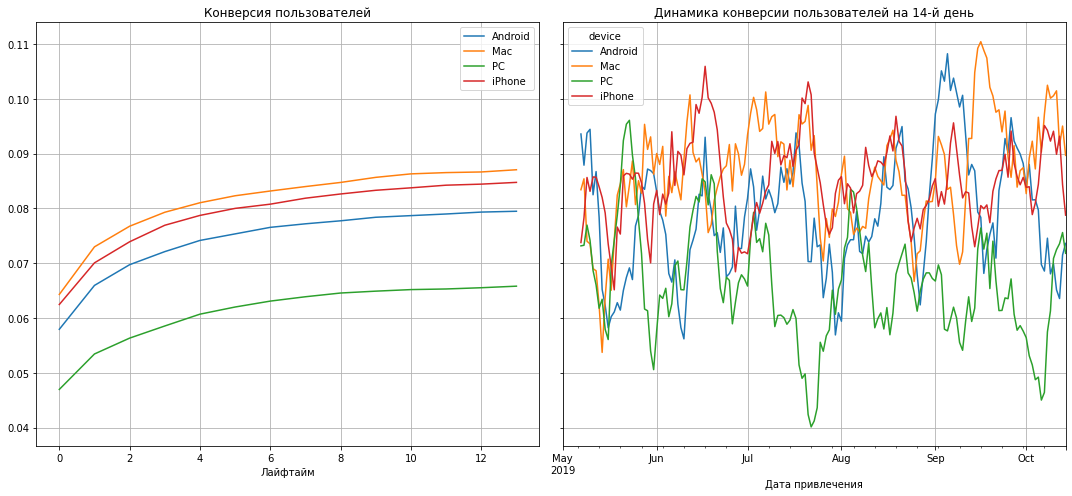

In [90]:
plot_conversion(conversion_table_dev, conversion_in_time_dev,
                horizon_days, window=7)

Посмотрим на удержание.

In [91]:
retention_raw_dev, retention_table_dev, retention_in_time_dev = (
    get_retention(profiles_new, df_visits, observation_date, horizon_days,
                  dimensions=['device'])
)

In [92]:
retention_table_dev

cohort_size    0         1         2         3         4  \
payer device                                                              
False Android        18453  1.0  0.175202  0.086653  0.052187  0.031431   
      Mac            15708  1.0  0.179781  0.085880  0.049784  0.033486   
      PC             16430  1.0  0.174985  0.087097  0.052282  0.034145   
      iPhone         28445  1.0  0.177852  0.086658  0.052804  0.033890   
True  Android         1639  1.0  0.383771  0.297743  0.248932  0.216595   
      Mac             1555  1.0  0.365916  0.284244  0.203859  0.198071   
      PC              1182  1.0  0.421320  0.331641  0.262267  0.263113   
      iPhone          2726  1.0  0.371240  0.276963  0.235510  0.194791   

                      5         6         7         8         9        10  \
payer device                                                                
False Android  0.023790  0.017341  0.013873  0.010838  0.009917  0.007749   
      Mac      0.023873  0.019353  0.014451  0.012605  0.008976  0.007958   
      PC       0.023920  0.017590  0.014607  0.011260  0.008704  0.007060   
      iPhone   0.025699  0.019265  0.014238  0.011777  0.009949  0.007383   
True  Android  0.208664  0.158023  0.164735  0.147651  0.136059  0.133618   
      Mac      0.171061  0.149839  0.143408  0.136334  0.133762  0.122186   
      PC       0.209814  0.227580  0.192893  0.172589  0.152284  0.164975   
      iPhone   0.184519  0.159574  0.144901  0.135730  0.130961  0.130594   

                     11        12        13  
payer device                                 
False Android  0.006340  0.005473  0.005094  
      Mac      0.006303  0.006366  0.004138  
      PC       0.005539  0.005965  0.005539  
      iPhone   0.006820  0.006363  0.004465  
True  Android  0.111653  0.130567  0.108603  
      Mac      0.115756  0.109968  0.111254  
      PC       0.148054  0.142978  0.126904  
      iPhone   0.122157  0.108584  0.093544

In [93]:
retention_in_time_dev.tail()

cohort_size    0         1         2         3  \
payer device dt                                                           
True  iPhone 2019-10-10           21  1.0  0.523810  0.380952  0.190476   
             2019-10-11           12  1.0  0.583333  0.166667  0.250000   
             2019-10-12           30  1.0  0.266667  0.433333  0.266667   
             2019-10-13           12  1.0  0.083333  0.333333  0.416667   
             2019-10-14           15  1.0  0.333333  0.200000  0.266667   

                                4         5         6         7         8  \
payer device dt                                                             
True  iPhone 2019-10-10  0.380952  0.142857  0.000000  0.190476  0.142857   
             2019-10-11  0.333333  0.000000  0.166667  0.083333  0.166667   
             2019-10-12  0.166667  0.233333  0.133333  0.233333  0.100000   
             2019-10-13  0.250000  0.333333  0.166667  0.000000  0.250000   
             2019-10-14  0.266667  0.066667  0.200000  0.133333  0.200000   

                                9        10        11        12        13  
payer device dt                                                            
True  iPhone 2019-10-10  0.190476  0.190476  0.285714  0.190476  0.095238  
             2019-10-11  0.166667  0.083333  0.083333  0.083333  0.083333  
             2019-10-12  0.166667  0.100000  0.000000  0.066667  0.100000  
             2019-10-13  0.250000  0.250000  0.083333  0.333333  0.000000  
             2019-10-14  0.000000  0.000000  0.066667  0.066667  0.133333

In [94]:
# проверим, совпадает ли сумма размеров когорт удержания с количеством новых 
# пользователей в анализируемый период

print(retention_table_dev['cohort_size'].sum())
profiles_new.loc[profiles_new['dt'] <= '2019-10-14', 'user_id'].count()

86138


86138

По таблицам видно, что значения в каждой строке снижаются. Момент и горизонт анализа также определены верно. Сумма размеров когорт удержания совпадает с количеством новых пользователей в анализируемый период. Значит, функция работет верно.

Теперь строим графики удержания с помощью функции `plot_retention()`.

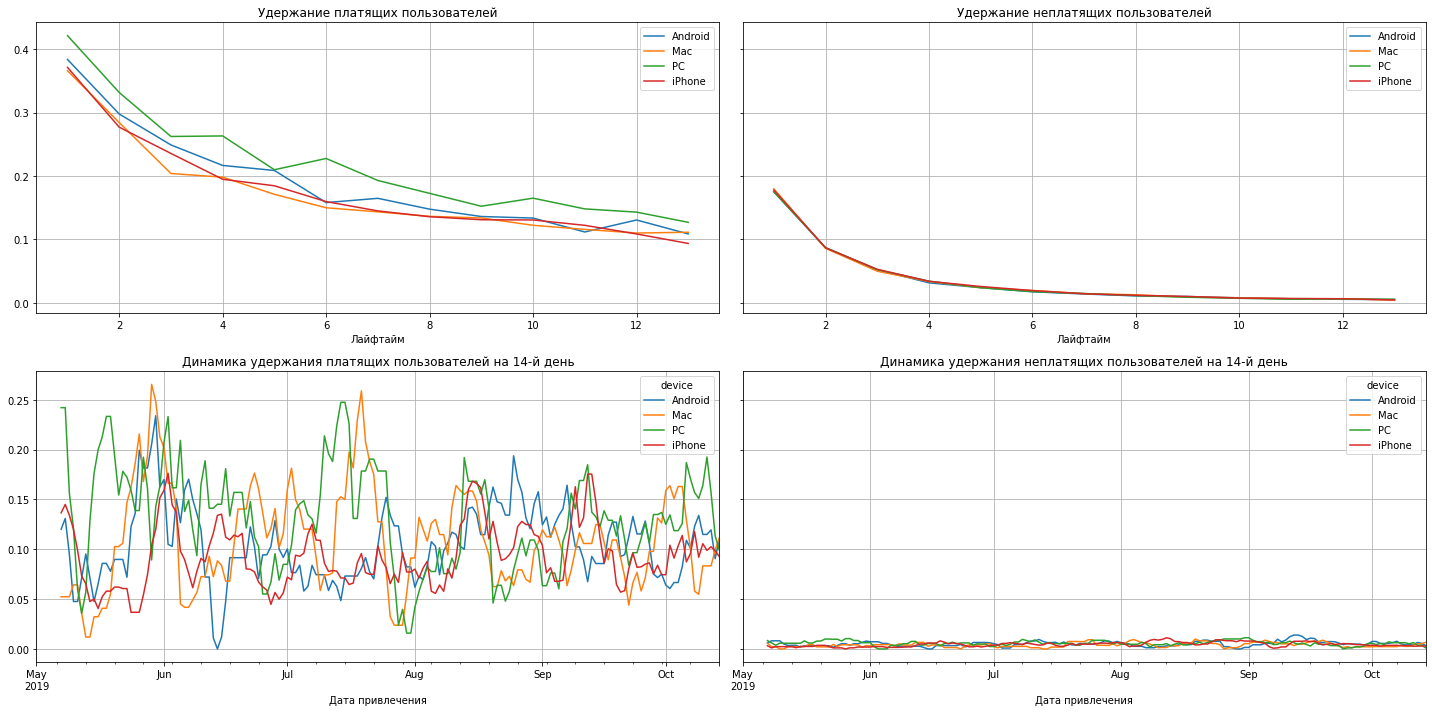

In [95]:
plot_retention(retention_table_dev, retention_in_time_dev,
               horizon_days, window=7)

**Вывод**

В целом, пользователи всех устройств конвертируются неплохо. В то же время у PC процент конвертации явно хуже, чем у устальных. В динамике видны провалы, особенно в июле и октябре, где конверсия на 14-ый день лайфтайма опускается до `4-4.6%`.

Удержание платящих пользователей всех устройств мало отличается друг от друга. Пользователи PC удерживаются немного лучше остальных.

Иными словами, владельцы PC возвращаются на сервис, но предпочитают пользоваться им бесплатно.

### Анализ удержания и конверсии по регионам

Построим таблицы конверсии и ее динамики с помощью функции `get_conversion()`, посмотрим, как они выглядят. Построим графики.

In [96]:
conversion_raw_reg, conversion_table_reg, conversion_in_time_reg = (
    get_conversion(profiles_new, df_orders, observation_date, horizon_days,
    dimensions=['region'])
    )

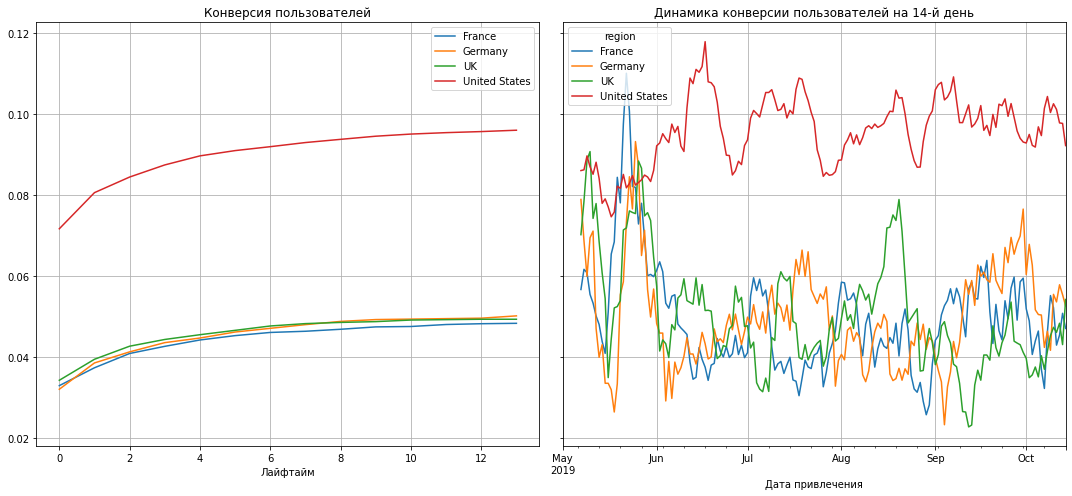

In [97]:
plot_conversion(conversion_table_reg, conversion_in_time_reg,
                horizon_days, window=7)

Посмотрим на удержание.

In [98]:
retention_raw_reg, retention_table_reg, retention_in_time_reg = (
    get_retention(profiles_new, df_visits, observation_date, horizon_days,
                  dimensions=['region'])
)

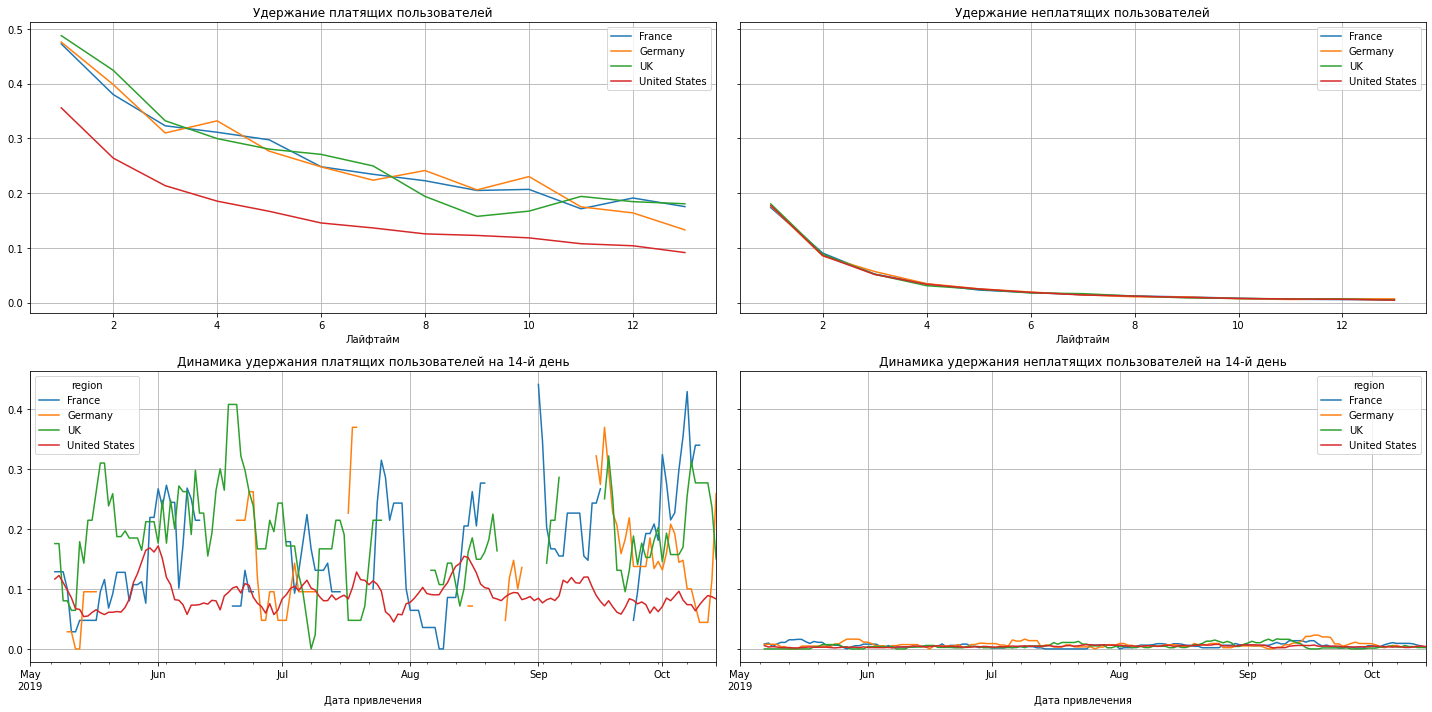

In [99]:
plot_retention(retention_table_reg, retention_in_time_reg,
               horizon_days, window=7)

**Вывод**

Конверсия пользовтелей из США лучше, чем у европейских пользователей в `2 раза`. При этом в динамике видно, что в мае пользователи из Европы конвертировались немного лучше, чем пользователи из США.

У европейцев есть разрывы в графике. Это значит, что пользователи из данных стран не привлекались.

При этом удержание платящих пользователей из США ниже, чем у европейцев. Пользователи из США охотнее готовы платить за сервис, но их сложно удержать.

### Анализ удержания и конверсии по каналам привлечения

Построим таблицы конверсии и ее динамики с помощью функции `get_conversion()`, посмотрим, как они выглядят. Построим графики.

In [100]:
conversion_raw_chan, conversion_table_chan, conversion_in_time_chan = (
    get_conversion(profiles_new, df_orders, observation_date, horizon_days,
    dimensions=['channel'])
    )

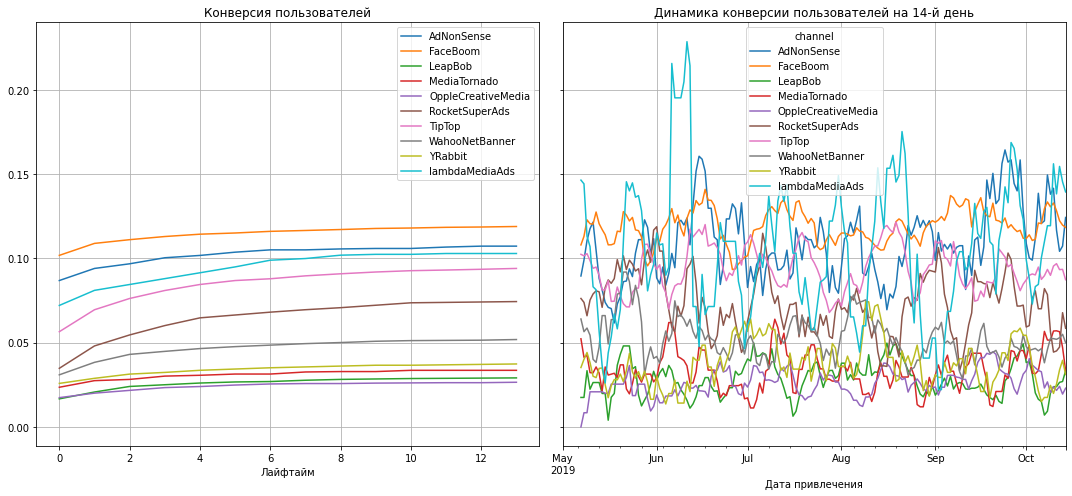

In [101]:
plot_conversion(conversion_table_chan, conversion_in_time_chan,
                horizon_days, window=7)

Посмотрим на удержание.

In [102]:
retention_raw_chan, retention_table_chan, retention_in_time_chan = (
    get_retention(profiles_new, df_visits, observation_date, horizon_days,
                  dimensions=['channel'])
)

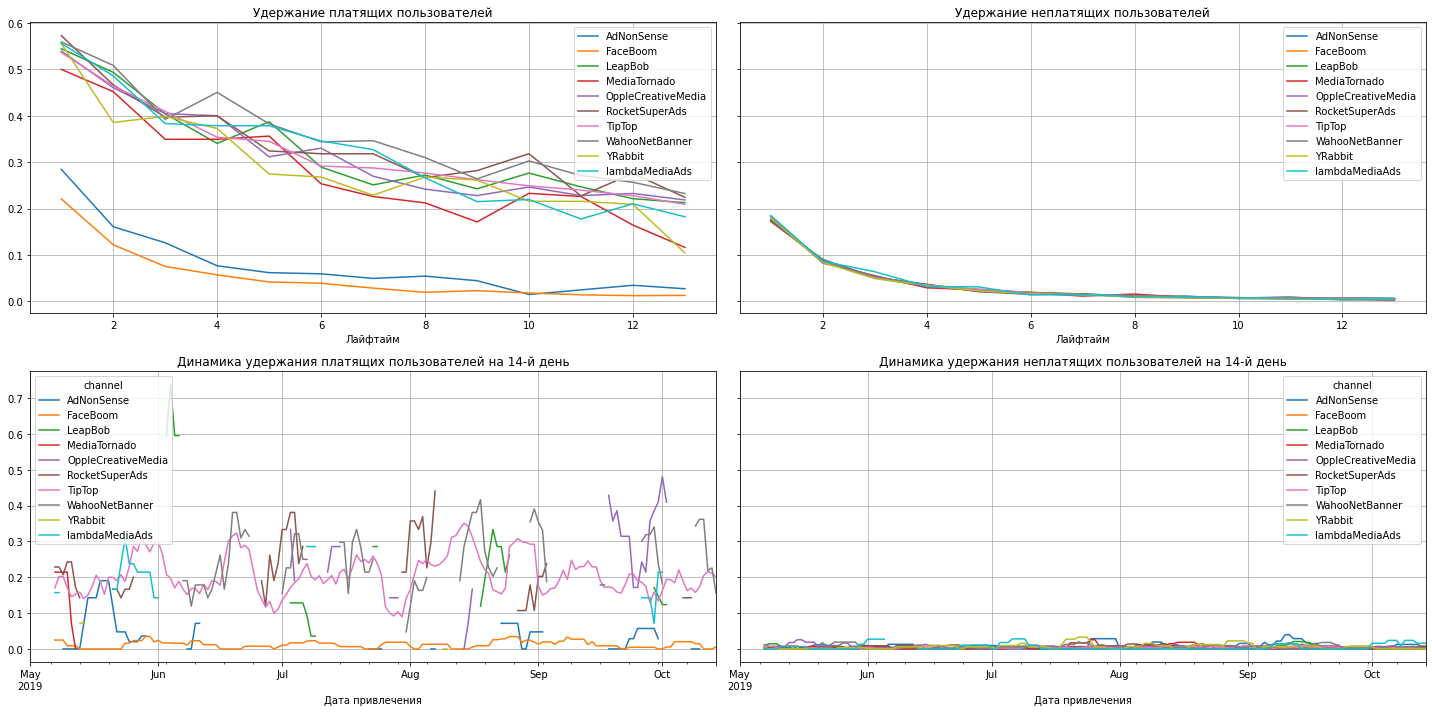

In [103]:
plot_retention(retention_table_chan, retention_in_time_chan,
               horizon_days, window=7)

**Вывод**

Лучше всего конвертируются пользователи из FaceBoom, AdNonSense, lambdaMediaAds, Tiptop и RocketSuperAds. При этом у первых трех конверсия к концу второй недели лайфтайма составляет более `10%`. Конверсия WahooNetBanner чуть более `5%`. Остальные 4 канала почти не конвертируются в течение двух недель и не превышают `4%`.

В динамике видно, что конверсия lambdaMediaAds имеет несколько скачков. Например, в июне конверсия пользователей из этого канала достигла `23%`.

Хуже всего удерживаются платящие пользователи, пришедшие из AdNonSense и FaceBoom. У остальных каналов показатель примерно одинаковый.

В то же время, в динамике видно, что только платящие пользователи из FaceBoom и TipTop продолжают пользоваться сервисом к концу второй недели лайфтайма. У остальных - большие разрывы. Например, пользователи из MediaTornado привлекались только в начале мая.

## Общий вывод

**Устройства**

`36%` новых пользователей использует IPhone, у `23%` - Android, а PC и Mac пользуется по `20%` пользователей.

`38%` платящих пользователей использует IPhone, `23%` - Android, `22%` - Mac и `20%` - PC.

Переход из неплатящих в платящих совершает `6.36%` пользователей Mac, `6.21%` пользователей IPhone, `5.85%` - Android, `5.05%` - PC. В целом, пользователи всех устройств конвертируются неплохо. В то же время у PC процент конвертации хуже, чем у устальных. В динамике видны провалы, особенно в июле и октябре, где конверсия на 14-ый день лайфтайма опускается до `4-4.6%`.

Удержание платящих пользователей всех устройств мало отличается друг от друга. Пользователи PC удерживаются немного лучше остальных.

В целом, `60%` пользователей заходит на сервис и оплачивает покупки через телефон, а `40%` - через ПК.

Ни один клиент в течение двух недель не приносит достаточное количество денег, чтобы окупить стоимость привлечения своего.

Пользователи Mac и IPhone имеют лучшую "пожизненную ценность", их динамика LTV достаточно стабильна, но из-за высокой стоимости привлечения, имеют низкий уровень возврата инвестиций - `73%` к концу второй недели лайфтайма. CAC для данных устройств вырос почти в `2 раза` за анализируемый период. Из динамики ROI видно, что пользователи данных устройств частично окупались в мае-июне, далее наблюдается спад.

LTV пользователей Android равен LTV пользователей IPhone, но из-за более низкой стоимости привлечения показатель ROI к концу второй недели лайфтайма равен `90%`. Динамика LTV стабильна, а динамика ROI на 14-ый день лайфтайма стабильнее, чем у остальных устройств; есть периоды окупаемости привлечения пользователей на протяжении всего анализируемого периода, кроме октября. При этом наблюдается тенденция снижения ROI. CAC для Android вырос на `60%` за анализируемый период.

Пользователи PC в среднем приносят наименьшее количество средств, но из-за низкой стоимости привлечения инвестиции окупаются на 11-ый день лайфтайма, и к 14-ому дню ROI достигает `106%`. При этом динамика выглядит очень нестабильно. На графике динамики LTV видны резкие падения показателя в мае, июне и октябре, что отражается и на возврате инвестиций. CAC для PC вырос на `36%` за анализируемый период.

В целом, пользователи PC окупаются лучше всего: октябрь - единственный месяц, в который показатель ROI был ниже `100%`. В мае этот показатель доходил до `170-180%`.

**Рекомендация: отделу маркетинга следует сфокусироваться над разработкой действий для удержания пользователей PC. Также необходимо посмотреть, что могло стать причиной резкого снижения конверсии в июле и октябре и LTV в мае, июне и октябре. Возможно, у пользователей PC были проблемы с оплатой.** 

**Регионы**

`67%` новых пользователей приходит из США, из Великобритании и Франции - по `12%`, а из Германии - `10%` пользователей.

`78%` платящих пользователей находится в США, в Великобритании - `8%`, во Франции и Германии - по `7%` пользователей.

Переход из неплатящих в платящих совершает `6.9%` новых пользователей из США, `4.1%` из Германии, `4%` из Великобритании и `3.8%` из Франции. Конверсия пользовтелей из США лучше, чем у европейских пользователей в среднем в `2 раза`. При этом в динамике видно, что в мае пользователи из Европы конвертировались немного лучше, чем пользователи из США.

Таким образом, основной объем пользователей сервиса, как платящих, так и не платящих, находится в США. Пользователи из США с большей вероятностью становятся платящими.

При этом удержание платящих пользователей из США ниже, чем у европейцев. Пользователи из США охотнее готовы платить за сервис, но их сложно удержать. В то же время у европейцев есть периоды, когда ни один новый пользователь не вернулся на 14-ый день лайфтайма.

У пользователей из США наивысший показатель LTV, но в то же время CAC для США равен `1.45`, когда макисмальный LTV США немного превышет `1`. Динамика LTV достаточно стабильна, но из-за высокой стоимости привлечения показатель ROI равен `70%` к концу второй недели лайфтайма. Динамика ROI отображает тенденцию постоянного спада; пользователи окупались только в мае и июне. За 5.5 месяцев CAC увеличился на `122%`.

Пользователи из Европы тоже приносят достаточное количество средств, чтобы окупить свое привлечение: их LTV превышает соответствующий CAC на `46-63%`. На графике динамики CAC видно резкое сокращение бюджета на рекламные компании в Европе на `32%` в июне по сравнению с маем. Далее график стабилен. Показатель ROI для европейцев достигает `100%` на 4-6 день лайфтайма, а концу 14-ого дня равен `149-153%`. При этом динамика показателей не так стабильна, как для пользователей из США.

**Рекомендация: отделу маркетинга стоит обратить внимание на удержание платящих пользователей, особенно европейских: они стоят недорого и возвращают `50%` инвестиций сверху. Возможно, есть технические проблемы, которые наблюдаются в Европе, но их нет в США. Или есть контент, который не устраивает европейских пользователей. Например, Великобритании наблюдается два скачка возврата инвестиций в июле-августе, где значения превышают `300%`. Т.к. динамика CAC для королевства стабильна, то это вряд ли связано с какой-то рекламной компанией. Возможно, в сервис была добавлена какая-то функция, которая очень понравилась британским пользователям. Также стоит сократить бюджет на привлечение пользователей из Америки: они приносят больше всего денег, но стоимость привлечения слишком велика, из-за чего данные пользователи не окупаются. Возможно, стоит изменить настройки рекламной компании, чтобы целевая аудитория была определена лучше. Для этого сначала стоит проанализировать данные и поведение пользователей, пришедших из США.**








**Каналы привлечения**

`38%` новых пользователей приходит самостоятельно, `19%` - через FaceBoom, а `13%` через TipTop.

`40%` платящих пользователей пришли через FaceBoom, `21%` - через TipTop, `13%` зашли на сервис без посредников.

Несмотря на то, что основной объем новых пользователей приходит на сервис самостоятельно, процент перехода в платящих у  канала organic самый маленький.

Переход из неплатящих в платящих совершает `12.2%` пользователей, пришедших через FaceBoom, `11.34%` - через AdNonSense, `10.47%` - через lambdaMediaAds, `9.6%` - через TipTop. Наименьший процент у пользователей, которые нашли сервис сами - `2.06%`. Конверсия WahooNetBanner чуть более `5%`. Остальные 4 канала почти не конвертируются в течение двух недель и не превышают `4%`.

В динамике видно, что конверсия lambdaMediaAds имеет несколько скачков. Например, в июне конверсия пользователей из этого канала достигла `23%`.

Хуже всего удерживаются платящие пользователи, пришедшие из AdNonSense и FaceBoom. У остальных каналов показатель примерно одинаковый.

В то же время, в динамике видно, что только платящие пользователи из FaceBoom и TipTop продолжают пользоваться сервисом к концу второй недели лайфтайма. У остальных - большие разрывы.

По привлечению денег явно выделяется LambdaMediaAds. При стабильном и не самом дорогом CAC данный канал имеет самый высокий LTV: пользователи окупаются на 2-3 день лайфтайма и к концу второй недели приносят на `142%` больше денег, чем было потрачено на их привлечение. Динамика LTV не стабильна, очень выделяется скачок в июне, но динамика ROI достаточно стабильна, реклама окупается ежемесячно.

Самый высокий показатель ROI у YRabbit и MediaTornado - `260%` и `245%` соответственно. Динамика ROI не стабильна, но ежемесячно выше `100%`. Показатель LTV достигает медианный CAC только к концу второй недели, но свой CAC данные каналы превышают в `2,5 раза`. Стоимость привлечения одного клиента стабильная и низкая.

Самый низкий ROI у AdNoneSense, FaceBoom и TipTop: `83%`, `74%` и `55%` соответственно. Привлечение пользователя из AdNoneSense достаточно дорогое, а данные пользователи приносят недостаточно средств, чтобы себя окупить. Динамика ROI стабильна, есть периоды в июле-сентябре, когда показатель превышал `100%`. То же можно сказать и про FaceBoom, но ROI в динамике ни разу не пересекал `100%`.

Пользователи из TipTop имеют высокий LTV, который стабилен в динамике, т.е. качество пользователей хорошее. Но бюджет на рекламу постоянно увеличивался из-за чего показатель ROI самый низкий и в динамике ни разу не пересекал `100%`. За 5.5 месяцев стоимость привлечения одного клиента увеличилась в `3.5 раза`.

В период с 01.05.2019 г. по 27.10.2019 г. на рекламу было потрачено `105 497 условных единиц`. Из них `52%` было потрачено на привлечение пользователей из TipTop, `31%` - FaceBoom, `17%` распределены между остальными восемью каналами привлечения. При этом, новых пользователей и платящих пользователей из TipTop меньше, чем из FaceBoom. Пользователи из TipTop конвертируются в платящих хуже, чем пользователи, пришедшие из AdNonSense и lambdaMediaAds. На эти каналы было потрачено `4%` и `1%` бюджета соответственно.

Несмотря на вышесказанное, траты на TipTop постоянно увеличивались: за 25 недель траты в неделю увеличись почти в `10 раз`. У FaceBoom недельные траты увеличились в `3 раза`. У WahooNetBanner - в `5 раз`, хотя только `5.3%` пользователей, пришедших оттуда конвертируются в платящих. В то же время траты на AdNonSense уменьшились почти на `30%`, а на lambdaMediaAds - на `34%`. 

Траты на MediaTornado и YRabbit остались на том же уровне.

Средняя стоимость привлечения одного клиента за период с 01.05.2019 г. по 27.10.2019 г. составила `0.70 условных единиц`.

Самые "дорогие" клиенты пришли из TipTop, FaceBoom, AdNonSense: их значения больше среднего в `4 раза`, `в 1.5 раза` и в `1.4 раза` соответственно. Пользователи, пришедшие из lambdaMediaAds, стоили как среднее значение.

Самые "дешевые" клиенты пришли из YRabbit, MediaTornado, LeapBob: их значения меньше среднего в `3 раза`.

Отделу маркетинга следует уменьшить траты на привлечение пользователей из TipTop и FaceBoom и увеличить траты на lambdaMediaAds, поскольку данные пользователи имеют хорошую конверсию и стоят недорого относительно TipTop и FaceBoom.

**Рекомендация: отделу маркетинга стоит сфокусироваться на каналах с наибольшей конверсией, высоким показателем LTV и относительно низкой стоимостью привлечения: lambdaMediaAds, MediaTornado и YRabbit. Также не стоит забывать и про TipTop: клиенты оттуда приносят приносят наибольшее количество денег, но траты на рекламу нужно сократить. Возможно, стоит изменить настройки рекламной компании, чтобы целевая аудитория была определена лучше. Для этого сначала стоит проанализировать данные и поведение пользователей, пришедших через этот канал.**